In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

# Retrieving clean dataframe 'viajes_merged_df3' to exploit its information
%store -r viajes_merged_df3
Data = viajes_merged_df3.copy()

#Matrix to municipios for API search
n_origens=3
m_destinations=3

In [2]:
# Show the shape of the data
Data.shape

(531594, 64)

In [3]:
Data.columns

Index(['id_via', 'id_soc', 'clasif_viaje', 'lugar_origen', 'municipio_origen',
       'estado_origen', 'colonia_origen', 'tipo_lugar_destino_',
       'municipio_destino', 'estado_destino', 'colonia_destino',
       'proposito_viaje', 'hora_comienzo', 'minuto_comienzo', 'hora_termino',
       'minuto_termino', '¿Mexicable?', '¿Auto?', '# Auto',
       '¿Colectivo/Micro?', '# Colectivo/Micro', '¿Taxi (App)?',
       '# Taxi (App)', '¿Taxi?', '#Taxi', '¿Metro?', '# Metro',
       '¿Autobus RTP?', '# Autobus RTP', '¿Bicicleta?', '#Veces Bicicleta',
       '¿Autobus?', '# Autobus', '¿Moto?', '# Moto', '¿Trolebus?',
       '# Trolebus', '¿Metrobus?', '# Metrobus', '¿Tren ligero?',
       '# Tren ligero', '¿Tren suburbano?', '# Tren suburbano', '¿Camino?',
       '# Camino', '#Mexicable', '¿Bicitaxi?', '# Bicitaxi', '¿Mototaxi?',
       '#Mototaxi', '¿Transporte escolar?', '#Transporte escolar',
       '¿Transporte de personal?', '#Transporte de personal', '¿Otro medio?',
       '# Otro medi

In [4]:
#Data.set_index('Unnamed: 0', drop=True, inplace=True)

In [5]:
Data.columns

Index(['id_via', 'id_soc', 'clasif_viaje', 'lugar_origen', 'municipio_origen',
       'estado_origen', 'colonia_origen', 'tipo_lugar_destino_',
       'municipio_destino', 'estado_destino', 'colonia_destino',
       'proposito_viaje', 'hora_comienzo', 'minuto_comienzo', 'hora_termino',
       'minuto_termino', '¿Mexicable?', '¿Auto?', '# Auto',
       '¿Colectivo/Micro?', '# Colectivo/Micro', '¿Taxi (App)?',
       '# Taxi (App)', '¿Taxi?', '#Taxi', '¿Metro?', '# Metro',
       '¿Autobus RTP?', '# Autobus RTP', '¿Bicicleta?', '#Veces Bicicleta',
       '¿Autobus?', '# Autobus', '¿Moto?', '# Moto', '¿Trolebus?',
       '# Trolebus', '¿Metrobus?', '# Metrobus', '¿Tren ligero?',
       '# Tren ligero', '¿Tren suburbano?', '# Tren suburbano', '¿Camino?',
       '# Camino', '#Mexicable', '¿Bicitaxi?', '# Bicitaxi', '¿Mototaxi?',
       '#Mototaxi', '¿Transporte escolar?', '#Transporte escolar',
       '¿Transporte de personal?', '#Transporte de personal', '¿Otro medio?',
       '# Otro medi

In [6]:
#EStimate the minutes of the travel
start=[]
end=[]
delta=[]
for time in range(len(Data)):
    hour=timedelta(hours=int(Data['hora_comienzo'][time]), minutes=int(Data['minuto_comienzo'][time]))
    hour_end=timedelta(hours=int(Data['hora_termino'][time]), minutes=int(Data['minuto_termino'][time]))

    lap=hour_end-hour

    start.append(hour)
    end.append(hour_end)
    if hour_end>hour:
        delta.append((lap.total_seconds()/3600)*60)
    else:
        delta.append(1440-((lap.total_seconds()/3600)*60)) #Avoid negative example 23:59 to 00:15 calculate 16 min insted of -1424
        
        
        
# Add a new column with the minutes in the travel
Data['Minutos transcurridos']=delta
Data['Star time']=start
Data['End time']=end

## Description of travels by origins and destinations

In [7]:
# Show Purpose to travel by day of week

Week=Data.loc[Data['clasif_viaje']=='Viaje realizado entre semana (Sección V)']
Saturday=Data.loc[Data['clasif_viaje']=='Viaje realizado en sábado (Sección VI)']


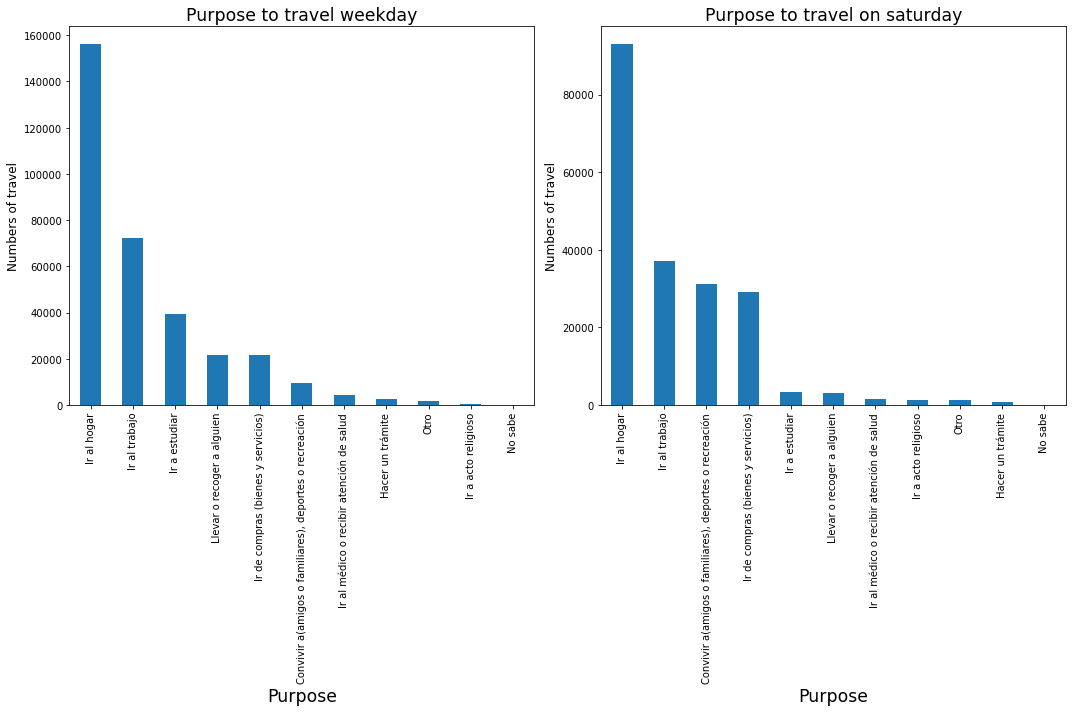

In [8]:
#Graph
fig_1=plt.figure(figsize=(15,10), tight_layout=True)

fig_1.add_subplot(1,2,1)
Week['proposito_viaje'].value_counts().plot(kind='bar')
plt.title(f'Purpose to travel weekday', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Purpose', fontsize='xx-large')
fig_1.add_subplot(1,2,2)
plt.title(f'Purpose to travel on saturday', fontsize='xx-large')
Saturday['proposito_viaje'].value_counts().plot(kind='bar')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Purpose', fontsize='xx-large')
plt.show()

In [9]:
Week['Minutos transcurridos'].mean()

44.618013835791004

In [10]:
Saturday['Minutos transcurridos'].mean()

47.129788034492655

In [11]:

#Show travel for Home or Workplace

Trip_to_Office_week=Week.loc[Week['proposito_viaje']=='Ir al trabajo']
Trip_to_Home_week=Week.loc[Week['proposito_viaje']=='Ir al hogar']

Trip_to_Office_saturday=Saturday.loc[Saturday['proposito_viaje']=='Ir al trabajo']
Trip_to_Home_saturday=Saturday.loc[Saturday['proposito_viaje']=='Ir al hogar']








Travel with the Purpose to workplace


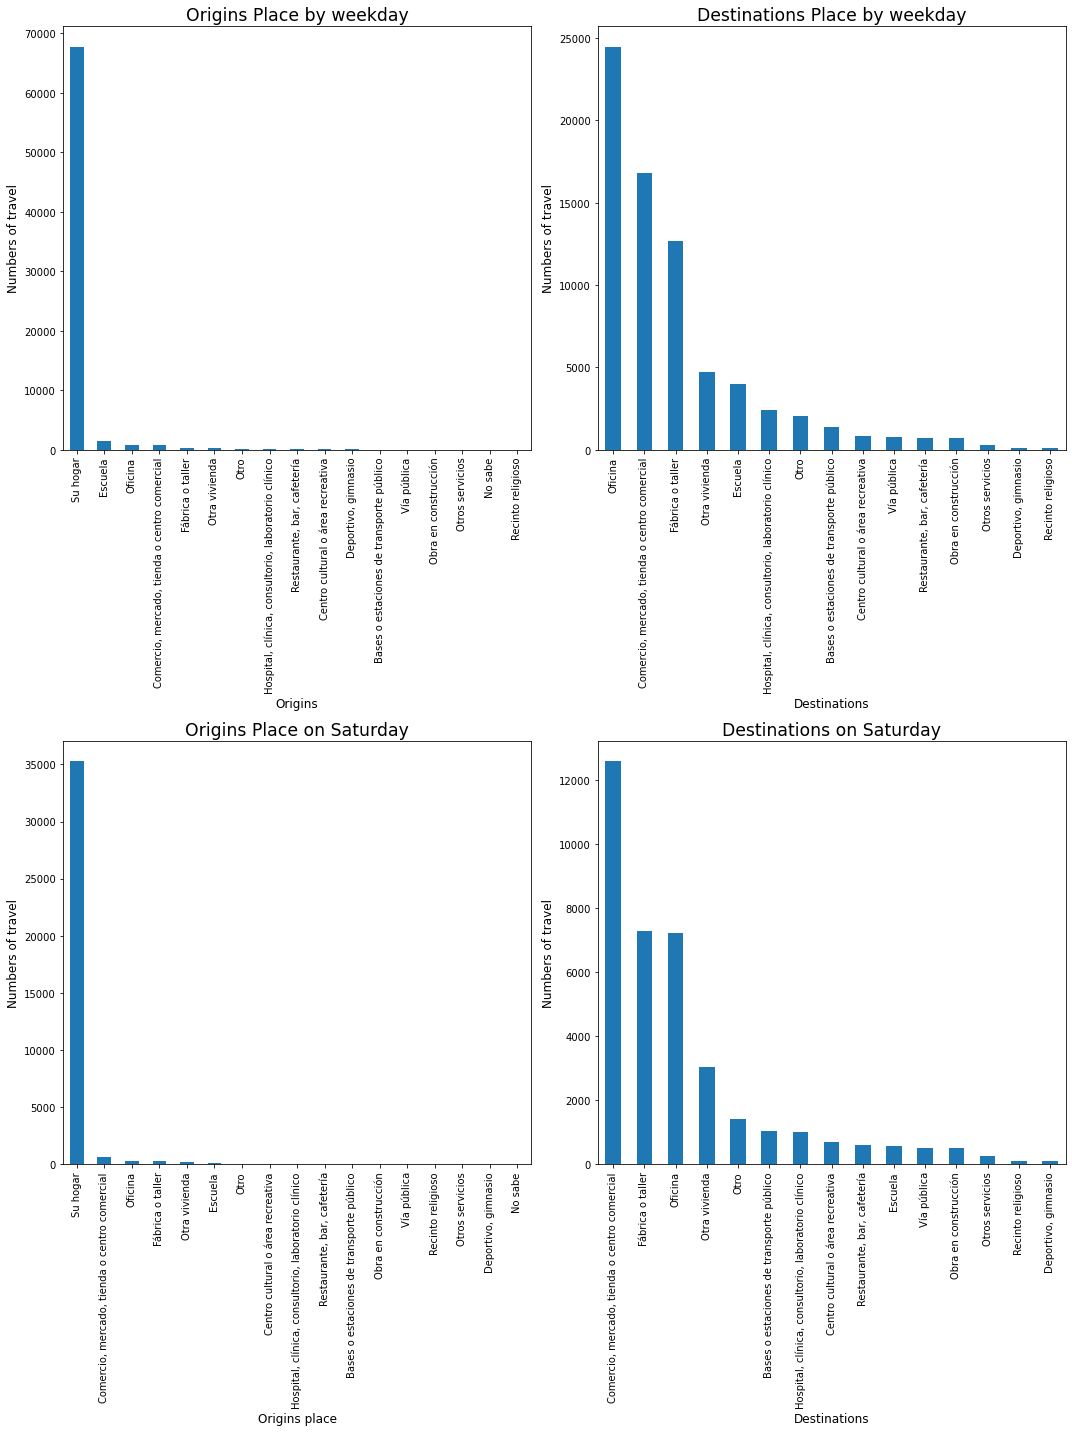

In [12]:
#Purpose to work place
print(f'Travel with the Purpose to workplace')
fig_2=plt.figure(figsize=(15,20), tight_layout=True)
fig_2.add_subplot(2,2,1)
Trip_to_Office_week['lugar_origen'].value_counts().plot(kind='bar')
plt.title(f'Origins Place by weekday', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Origins', fontsize='large')

fig_2.add_subplot(2,2,2)
Trip_to_Office_week['tipo_lugar_destino_'].value_counts().plot(kind='bar')
plt.title(f'Destinations Place by weekday', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Destinations', fontsize='large')

fig_2.add_subplot(2,2,3)
Trip_to_Office_saturday['lugar_origen'].value_counts().plot(kind='bar')
plt.title(f'Origins Place on Saturday', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Origins place', fontsize='large')

fig_2.add_subplot(2,2,4)
Trip_to_Office_saturday['tipo_lugar_destino_'].value_counts().plot(kind='bar')
plt.title(f'Destinations on Saturday', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Destinations', fontsize='large')



plt.show()

Travel with the Purpose to get Home


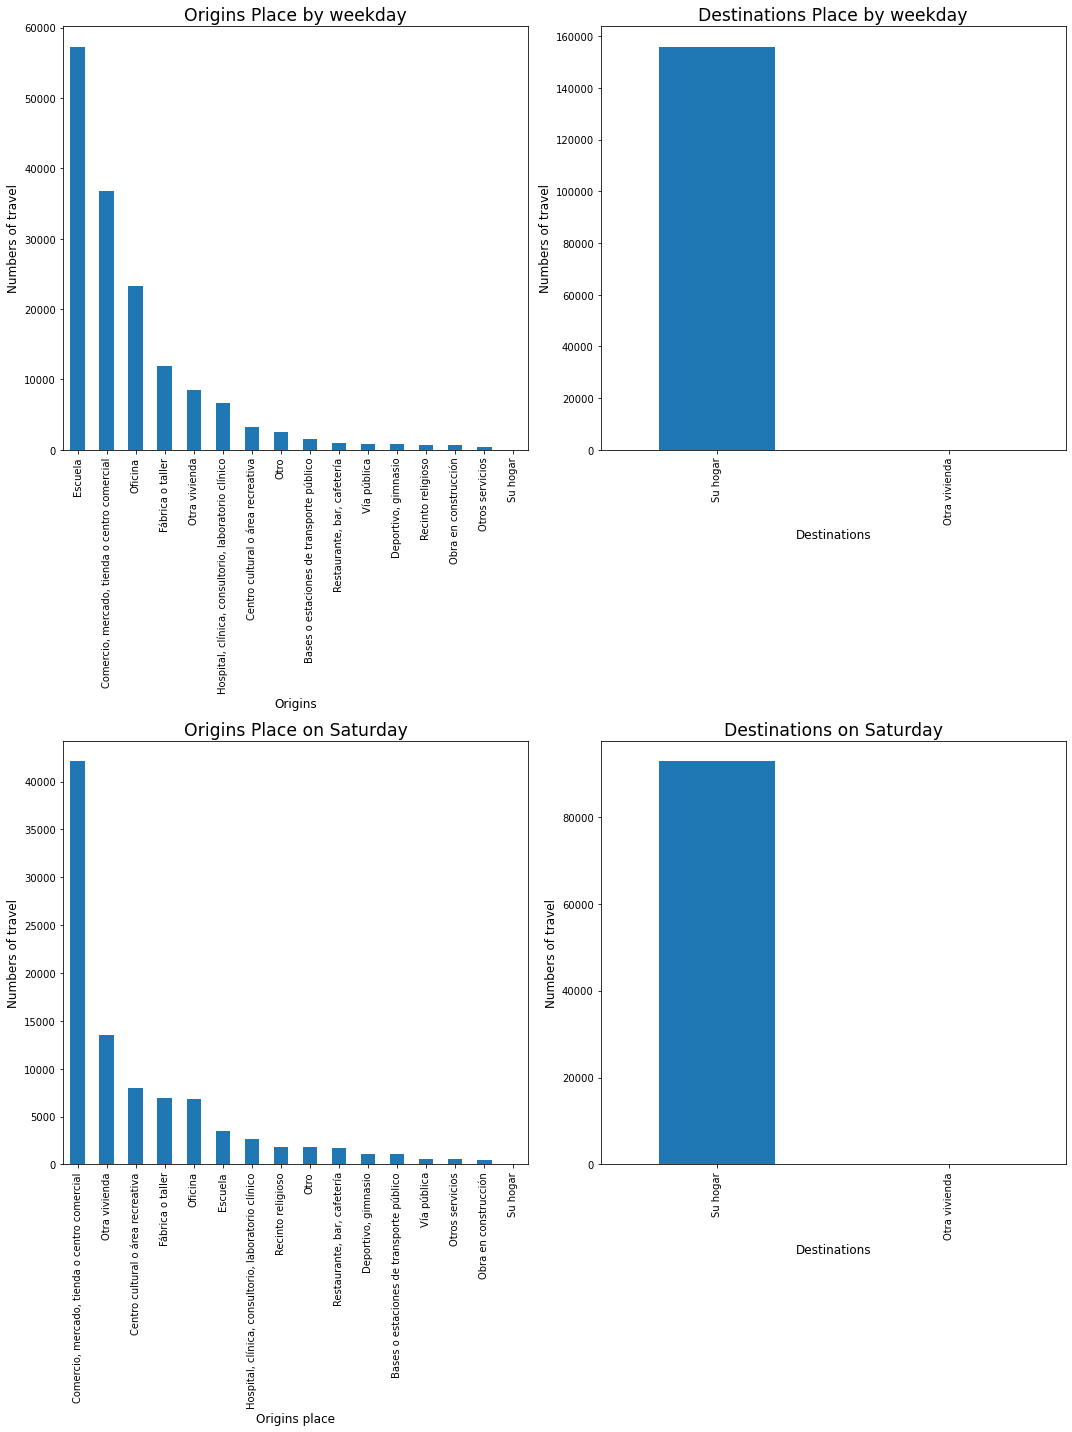

In [13]:
#Purpose to get home
print(f'Travel with the Purpose to get Home')
fig_3=plt.figure(figsize=(15,20), tight_layout=True)

fig_3.add_subplot(2,2,1)
Trip_to_Home_week['lugar_origen'].value_counts().plot(kind='bar')
plt.title(f'Origins Place by weekday', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Origins', fontsize='large')

fig_3.add_subplot(2,2,2)
Trip_to_Home_week['tipo_lugar_destino_'].value_counts().plot(kind='bar')
plt.title(f'Destinations Place by weekday', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Destinations', fontsize='large')

fig_3.add_subplot(2,2,3)
Trip_to_Home_saturday['lugar_origen'].value_counts().plot(kind='bar')
plt.title(f'Origins Place on Saturday', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Origins place', fontsize='large')

fig_3.add_subplot(2,2,4)
Trip_to_Home_saturday['tipo_lugar_destino_'].value_counts().plot(kind='bar')
plt.title(f'Destinations on Saturday', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Destinations', fontsize='large')



plt.show()

In [14]:
Trip_to_Office_week['Minutos transcurridos'].mean()

58.510683731055614

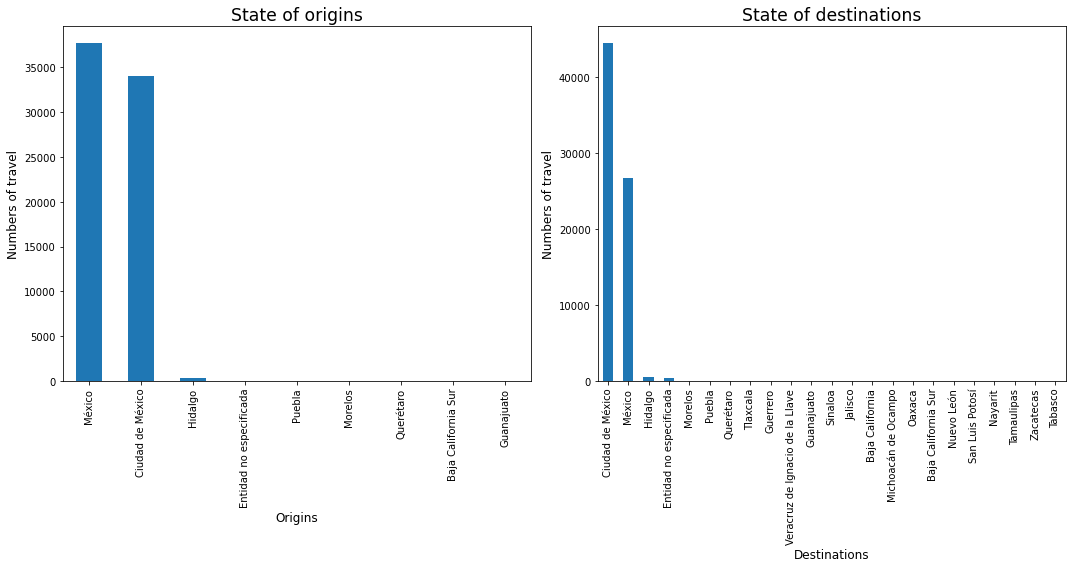

In [16]:
#Route of travel for work 


fig_4=plt.figure(figsize=(15,8), tight_layout=True)

fig_4.add_subplot(1,2,1)
Trip_to_Office_week['estado_origen'].value_counts().plot(kind='bar')
plt.title(f'State of origins', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Origins', fontsize='large')


fig_4.add_subplot(1,2,2)
Trip_to_Office_week['estado_destino'].value_counts().plot(kind='bar')
plt.title(f'State of destinations', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Destinations', fontsize='large')



plt.show()

# Travels with destination only CDMX

In [17]:
#Set up variables only for travel with destination in CDMX

CDMX_Destinations=Trip_to_Office_week.loc[Trip_to_Office_week['estado_destino']=='Ciudad de México']
Municipios_origen=CDMX_Destinations['municipio_origen'].value_counts()
Municipios_destinations=CDMX_Destinations['municipio_destino'].value_counts()

In [18]:
CDMX_Destinations.shape

(44399, 67)

In [19]:
#CDMX_Destinations.head(5)

#Saving CDMX Destinations in cache to get Normal Distribution
%store CDMX_Destinations
#del CDMX_Destinations

Stored 'CDMX_Destinations' (DataFrame)


In [20]:
CDMX_Destinations.columns

Index(['id_via', 'id_soc', 'clasif_viaje', 'lugar_origen', 'municipio_origen',
       'estado_origen', 'colonia_origen', 'tipo_lugar_destino_',
       'municipio_destino', 'estado_destino', 'colonia_destino',
       'proposito_viaje', 'hora_comienzo', 'minuto_comienzo', 'hora_termino',
       'minuto_termino', '¿Mexicable?', '¿Auto?', '# Auto',
       '¿Colectivo/Micro?', '# Colectivo/Micro', '¿Taxi (App)?',
       '# Taxi (App)', '¿Taxi?', '#Taxi', '¿Metro?', '# Metro',
       '¿Autobus RTP?', '# Autobus RTP', '¿Bicicleta?', '#Veces Bicicleta',
       '¿Autobus?', '# Autobus', '¿Moto?', '# Moto', '¿Trolebus?',
       '# Trolebus', '¿Metrobus?', '# Metrobus', '¿Tren ligero?',
       '# Tren ligero', '¿Tren suburbano?', '# Tren suburbano', '¿Camino?',
       '# Camino', '#Mexicable', '¿Bicitaxi?', '# Bicitaxi', '¿Mototaxi?',
       '#Mototaxi', '¿Transporte escolar?', '#Transporte escolar',
       '¿Transporte de personal?', '#Transporte de personal', '¿Otro medio?',
       '# Otro medi

In [21]:
CDMX_Destinations[['municipio_origen', 'municipio_destino', 'Minutos transcurridos', 'Star time','End time']]

,municipio_origen,municipio_destino,Minutos transcurridos,Star time,End time
0,Cuauhtémoc,Miguel Hidalgo,60.0,0 days 08:00:00,0 days 09:00:00
4,Cuauhtémoc,Miguel Hidalgo,60.0,0 days 08:00:00,0 days 09:00:00
22,Cuauhtémoc,Cuauhtémoc,5.0,0 days 07:30:00,0 days 07:35:00
30,Cuauhtémoc,Cuauhtémoc,75.0,0 days 06:00:00,0 days 07:15:00
42,Cuauhtémoc,Cuauhtémoc,20.0,0 days 07:20:00,0 days 07:40:00
...,...,...,...,...,...
530883,Tizayuca,Gustavo A. Madero,105.0,0 days 12:00:00,0 days 13:45:00
530967,Tizayuca,Azcapotzalco,130.0,0 days 04:45:00,0 days 06:55:00
530983,Tizayuca,Cuauhtémoc,170.0,0 days 05:00:00,0 days 07:50:00
531192,Tizayuca,Venustiano Carranza,120.0,0 days 05:00:00,0 days 07:00:00


In [22]:
CDMX_Destinations['municipio_origen'].unique()

array(['Cuauhtémoc', 'Gustavo A. Madero', 'Xochimilco', 'Miguel Hidalgo',
       'Álvaro Obregón', 'Tlalpan', 'Benito Juárez', 'Azcapotzalco',
       'Iztacalco', 'Coyoacán', 'Atizapán de Zaragoza', 'Iztapalapa',
       'Venustiano Carranza', 'Cuajimalpa de Morelos', 'Chalco',
       'Milpa Alta', nan, 'Ixtapaluca', 'Ecatepec de Morelos',
       'Nezahualcóyotl', 'Tehuacán', 'Coacalco de Berriozábal', 'Tecámac',
       'Naucalpan de Juárez', 'Huixquilucan', 'La Magdalena Contreras',
       'El Marqués', 'Tlalnepantla de Baz', 'Cuautitlán Izcalli',
       'Texcoco', 'Zumpango', 'Toluca', 'Tláhuac', 'Metepec', 'Tultepec',
       'Chimalhuacán', 'Amecameca', 'Valle de Chalco Solidaridad',
       'Jilotzingo', 'Nicolás Romero', 'Tepotzotlán', 'Villa del Carbón',
       'Cuautitlán', 'Tultitlán', 'Melchor Ocampo', 'Teoloyucan',
       'Huehuetoca', 'Coyotepec', 'Hueypoxtla', 'Tequixquiac',
       'Nextlalpan', 'Apaxco', 'Jaltenco', 'Axapusco', 'Tizayuca',
       'Tonanitla', 'Acolman', 'Ate

In [23]:
CDMX_Destinations[['Minutos transcurridos']].mean()


Minutos transcurridos    65.006059
dtype: float64

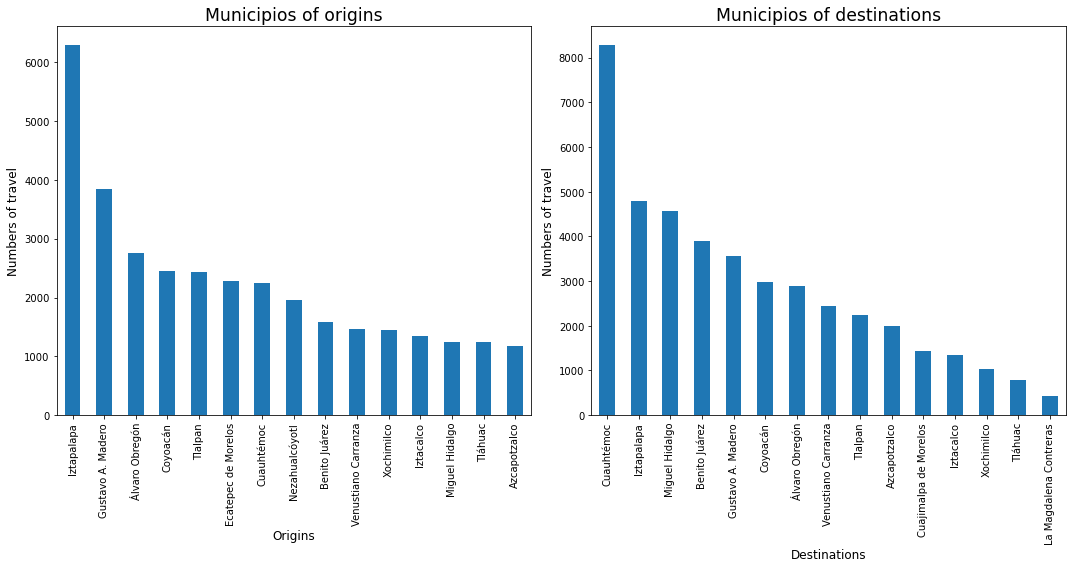

In [24]:
#graphing

fig_5=plt.figure(figsize=(15,8), tight_layout=True)

fig_5.add_subplot(1,2,1)
Municipios_origen.head(15).plot(kind='bar')
plt.title(f'Municipios of origins', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Origins', fontsize='large')


fig_5.add_subplot(1,2,2)
Municipios_destinations.head(15).plot(kind='bar')
plt.title(f'Municipios of destinations', fontsize='xx-large')
plt.ylabel('Numbers of travel', fontsize='large')
plt.xlabel('Destinations', fontsize='large')



plt.show()






## Transfer averages

In [25]:
#Table for origin to destinations with inner travel
Origen_point=[name_pointOrigin for name_pointOrigin in CDMX_Destinations['municipio_origen'].unique()]
Destination_point=[name_pointDestination for name_pointDestination in CDMX_Destinations['municipio_destino'].unique()]


In [26]:
DataFrame_Origen_Point=[] #Contruction of auxiliar to create summary tables
DataFrame_Destination_Point=[]

for name_point in Origen_point:
    DataFrame_Origen_Point.append(CDMX_Destinations.loc[CDMX_Destinations['municipio_origen']==name_point])


for name_point_destination in Destination_point:
    DataFrame_Destination_Point.append(CDMX_Destinations.loc[CDMX_Destinations['municipio_destino']==name_point_destination])



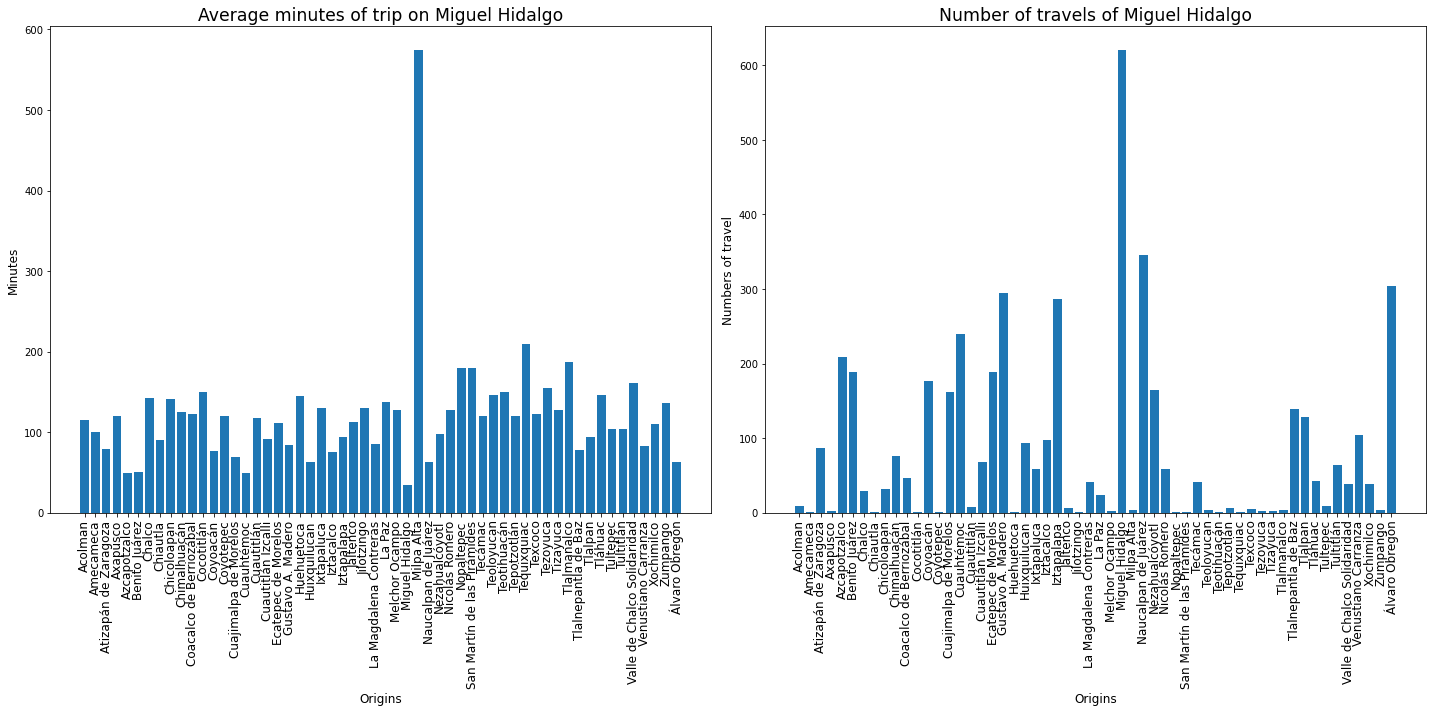

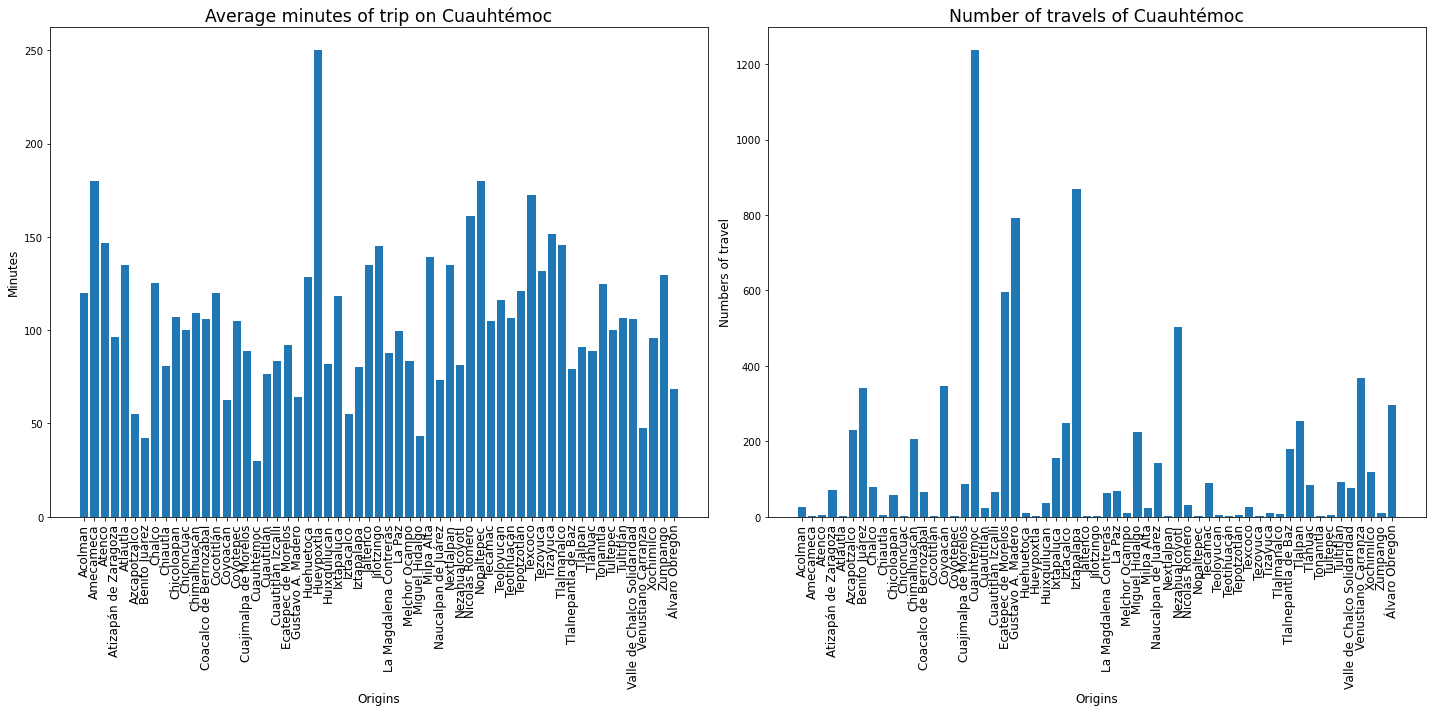

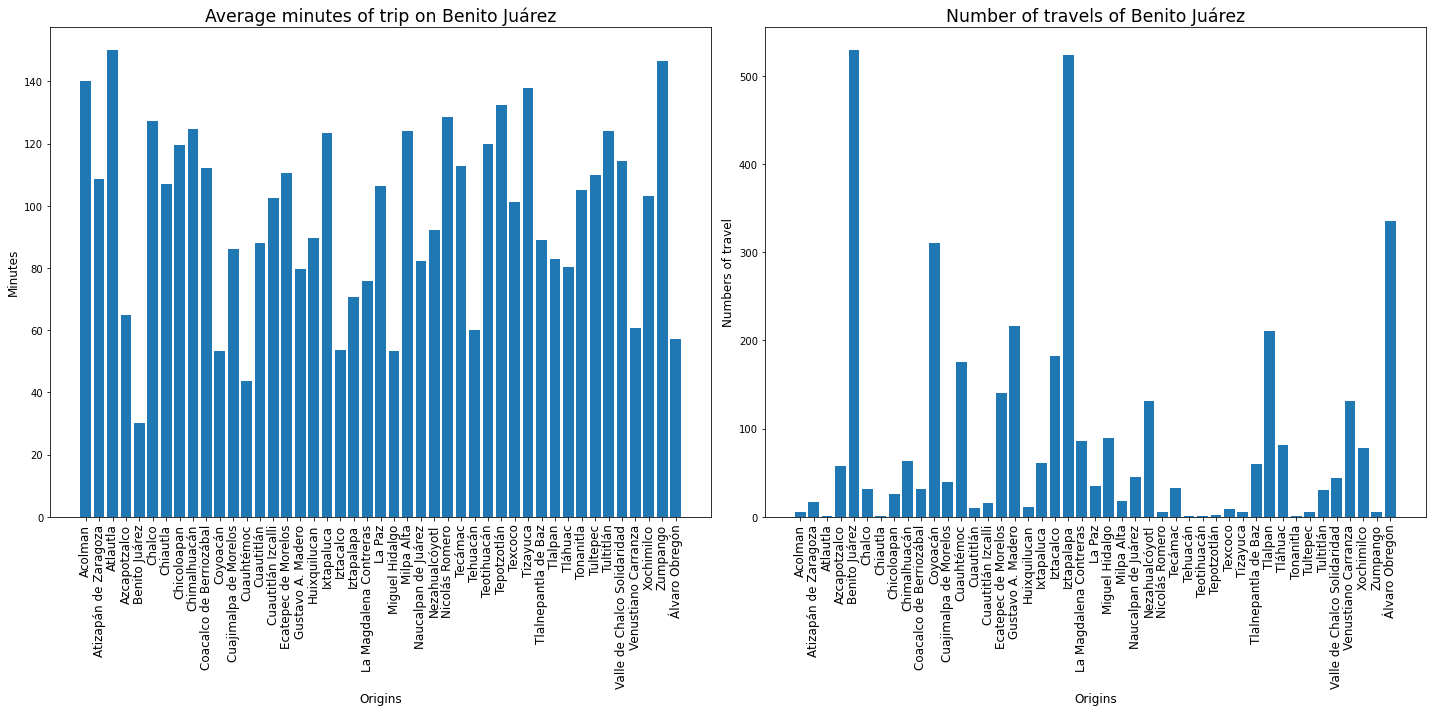

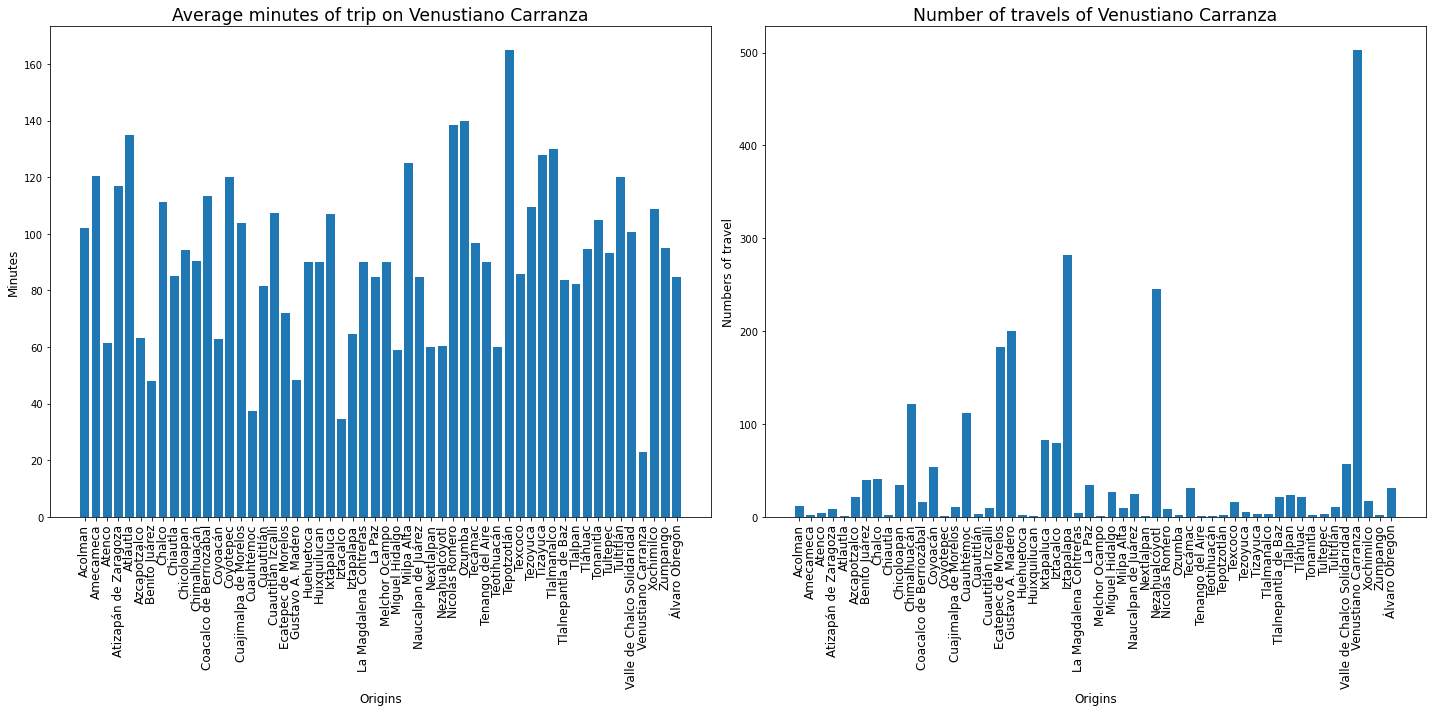

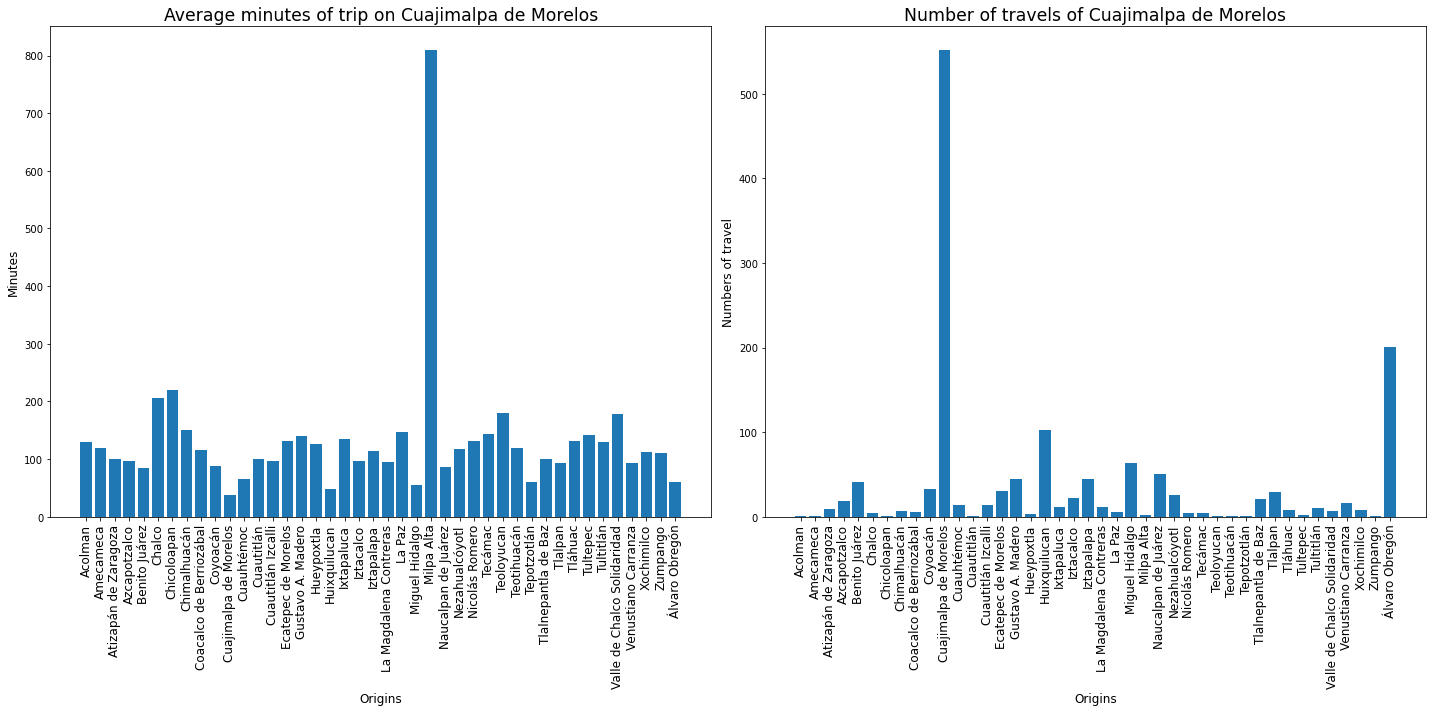

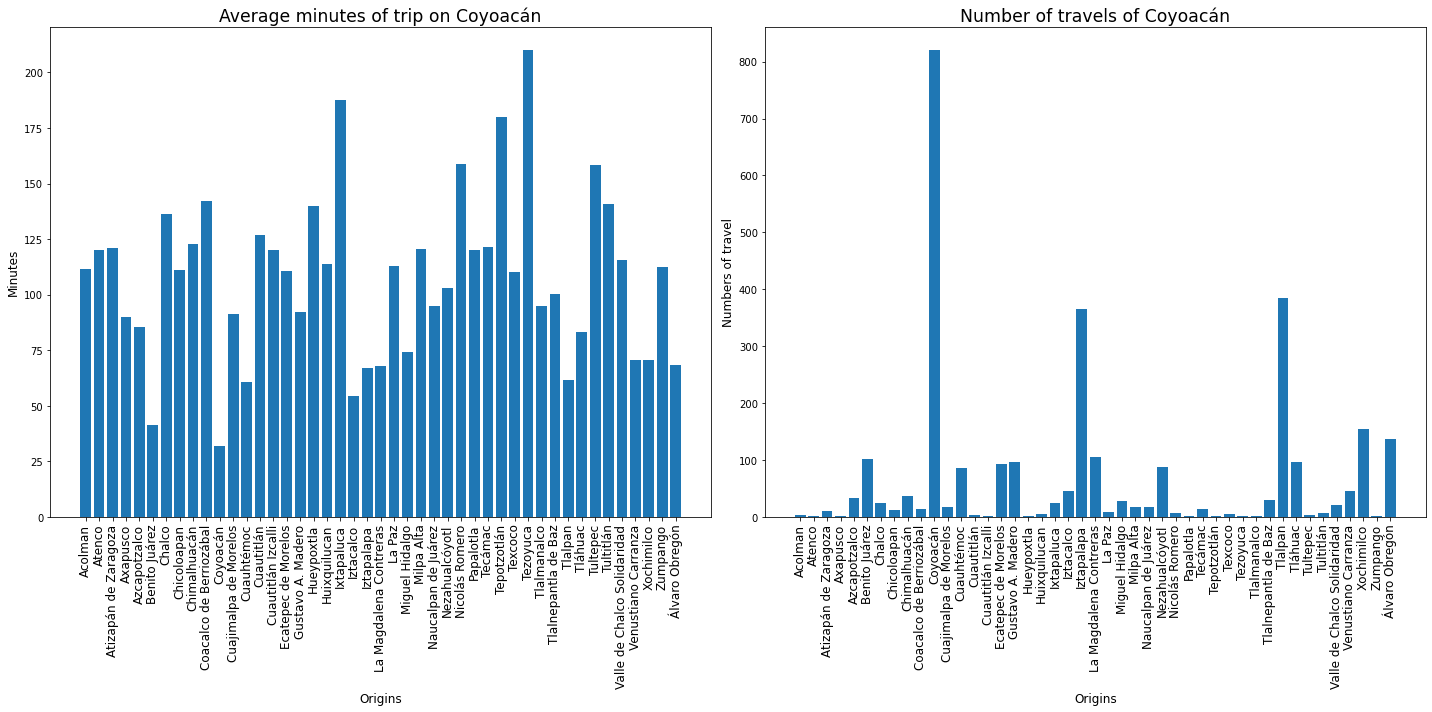

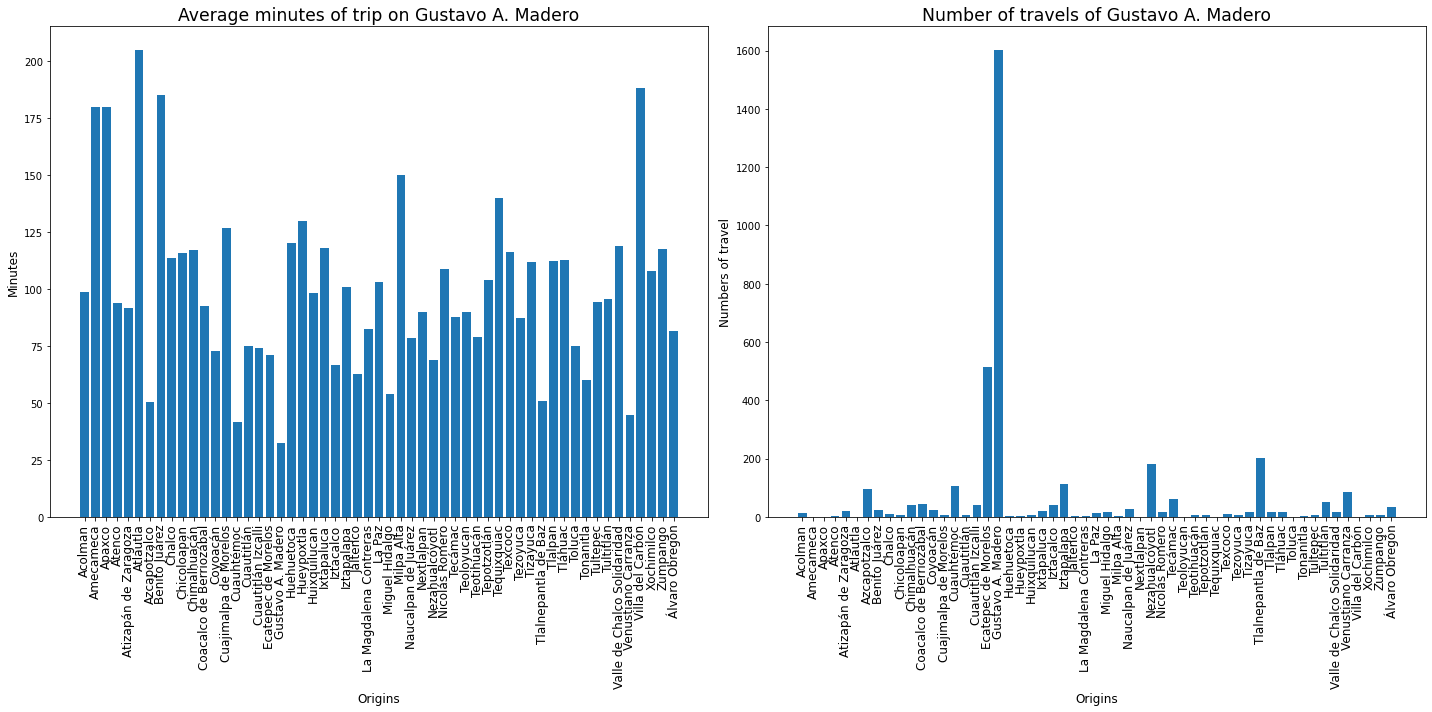

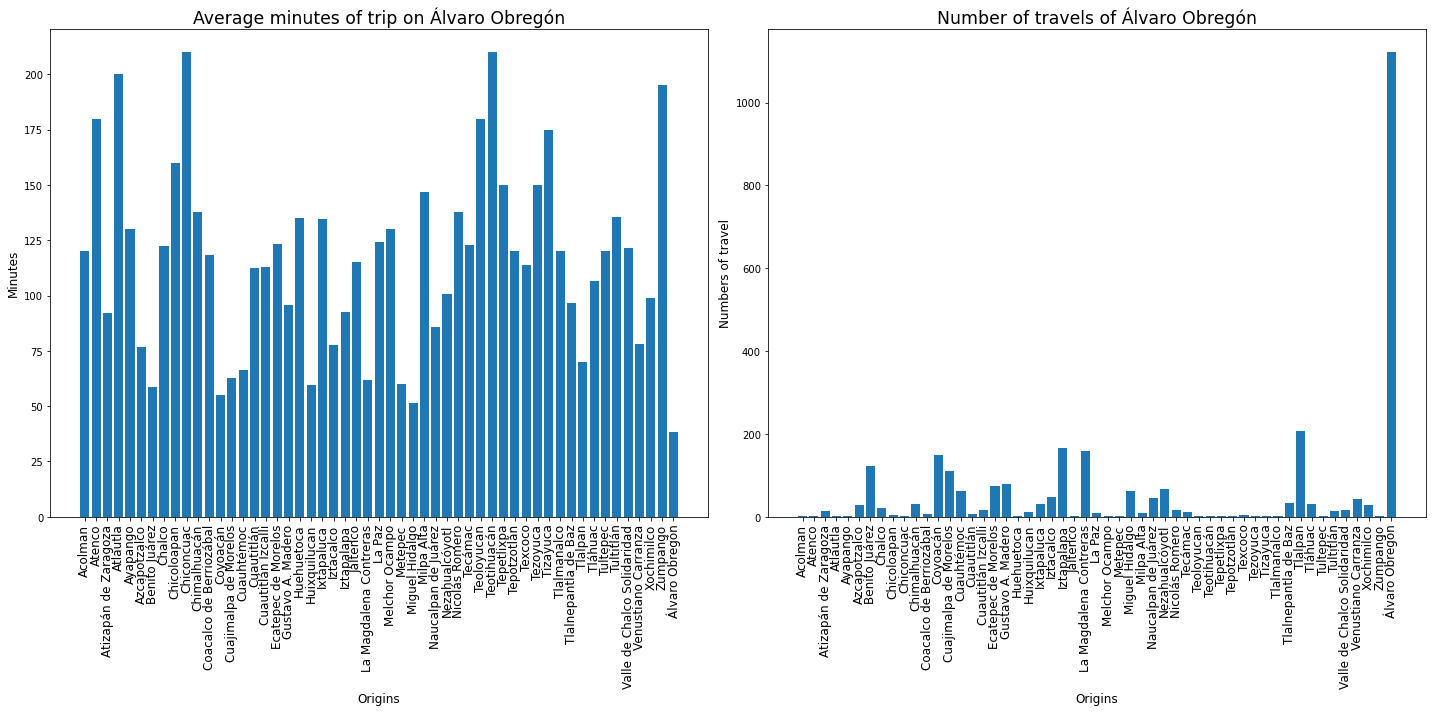

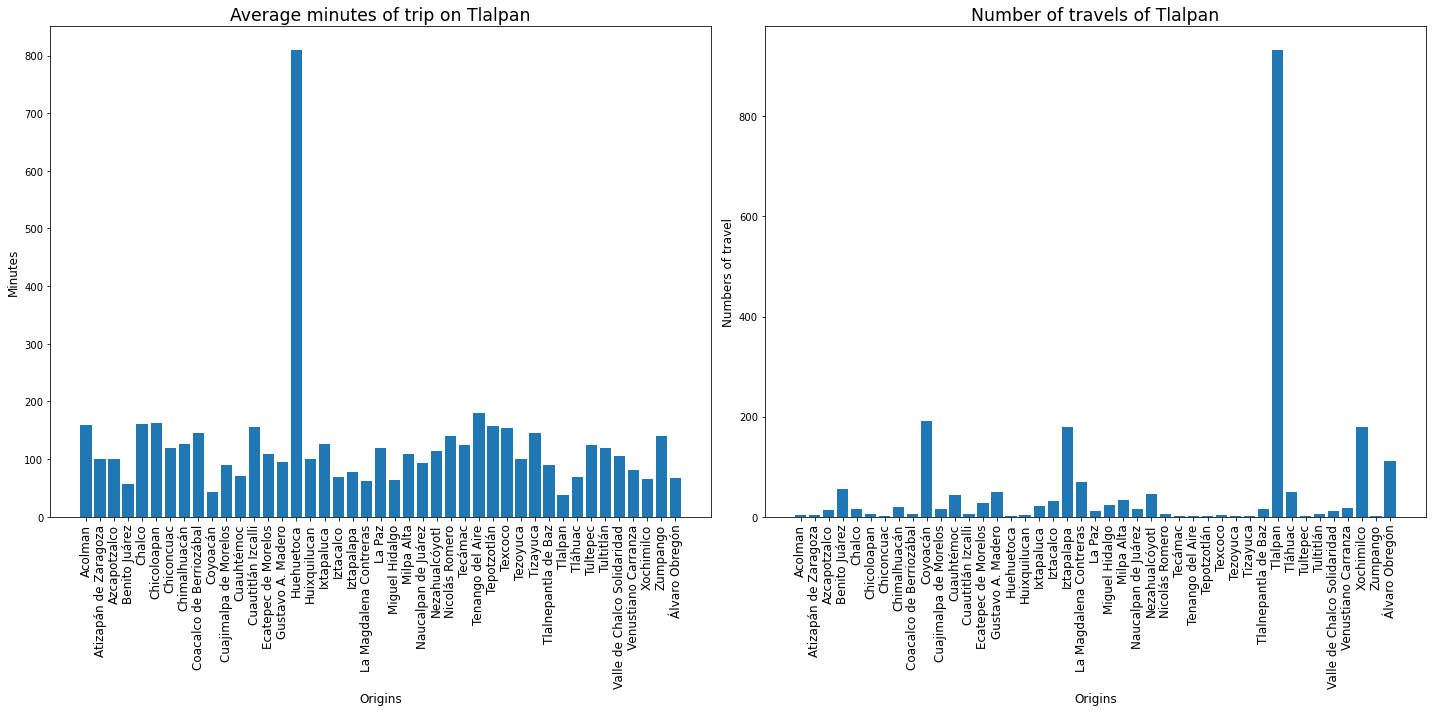

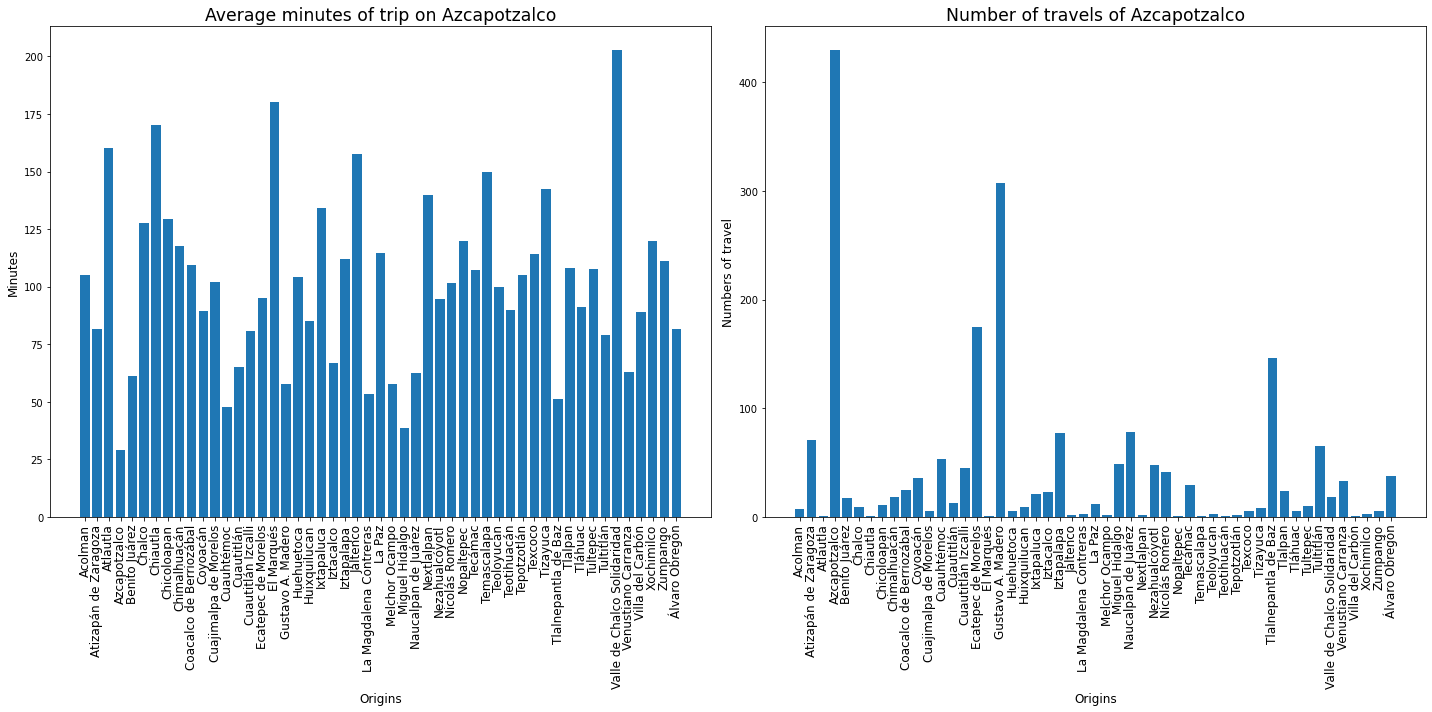

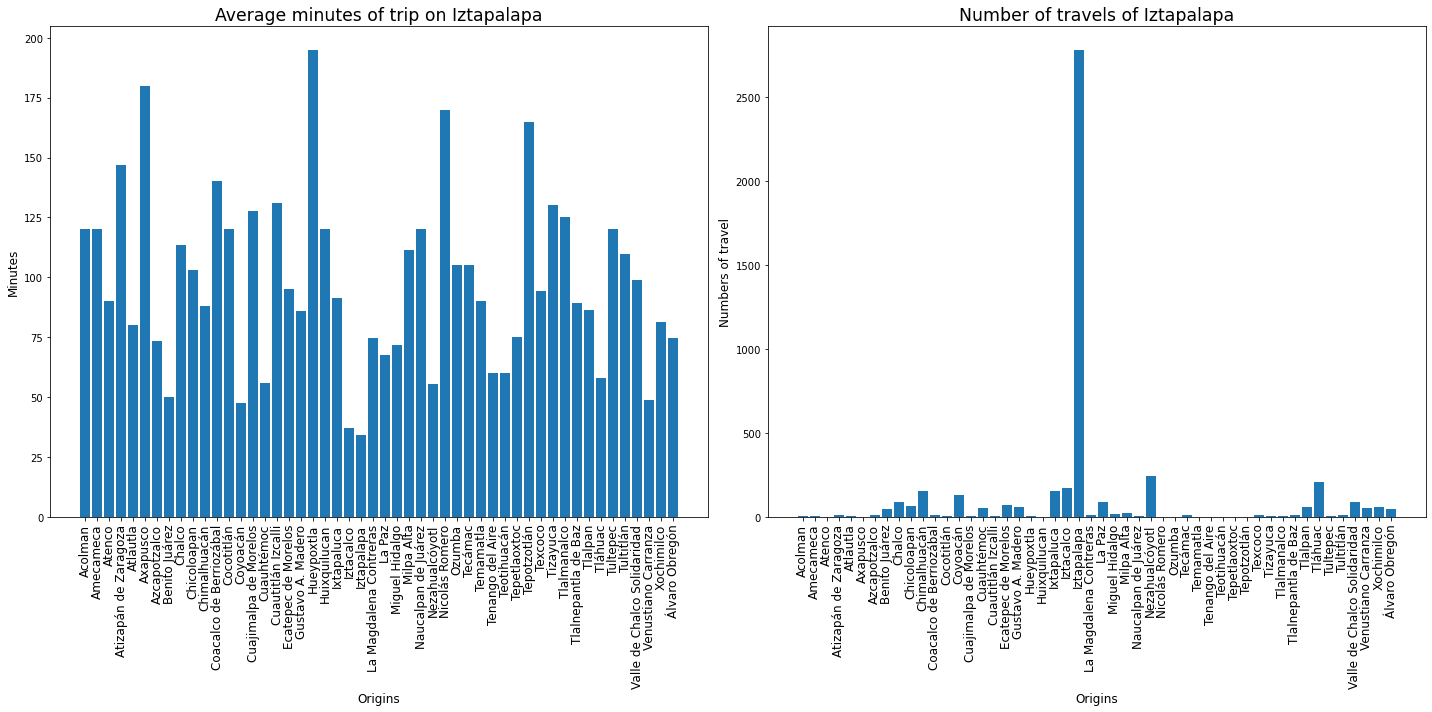

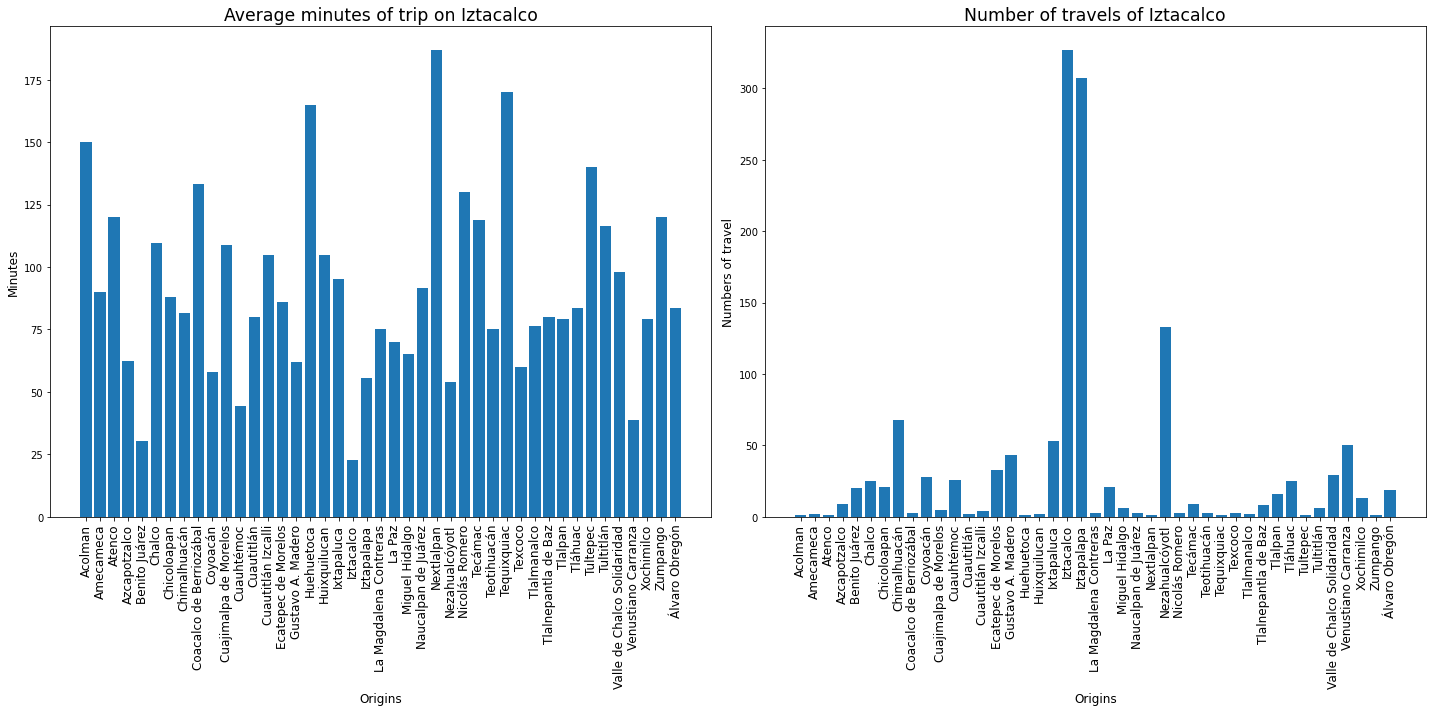

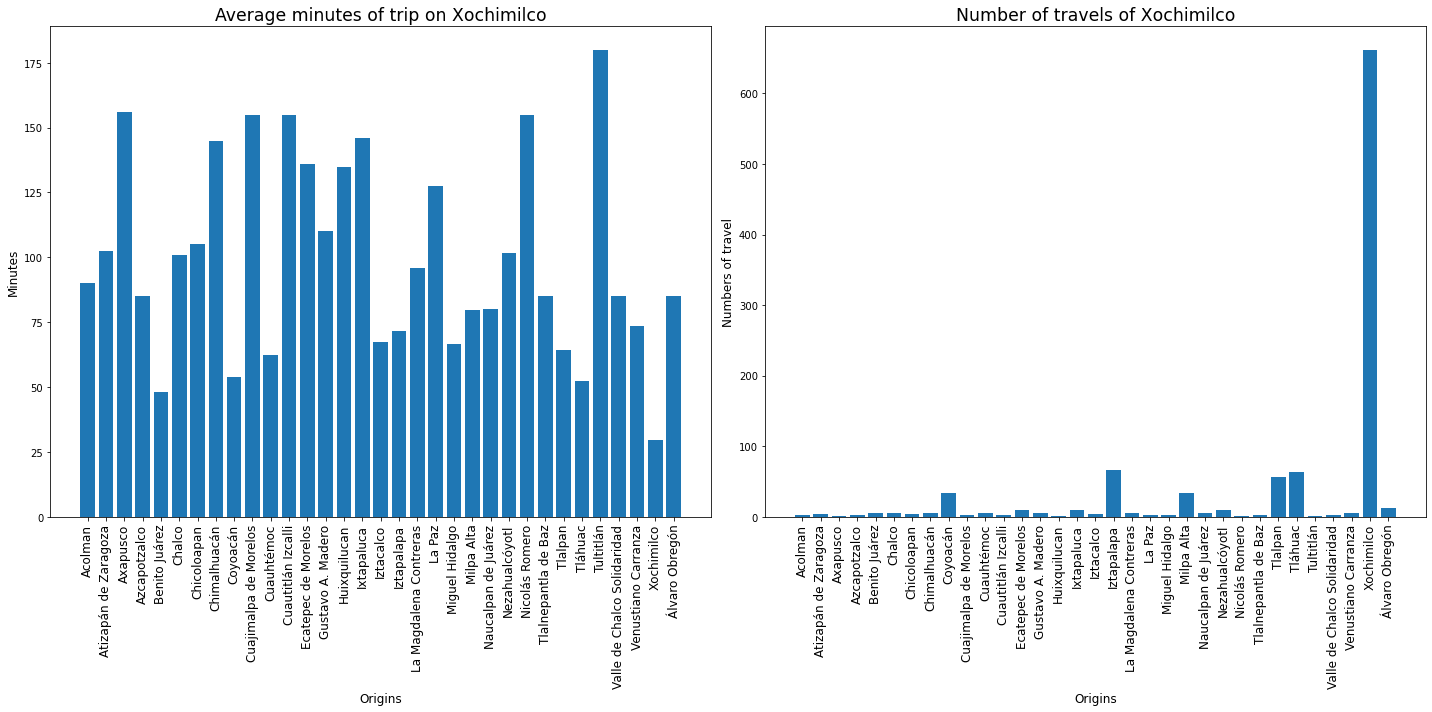

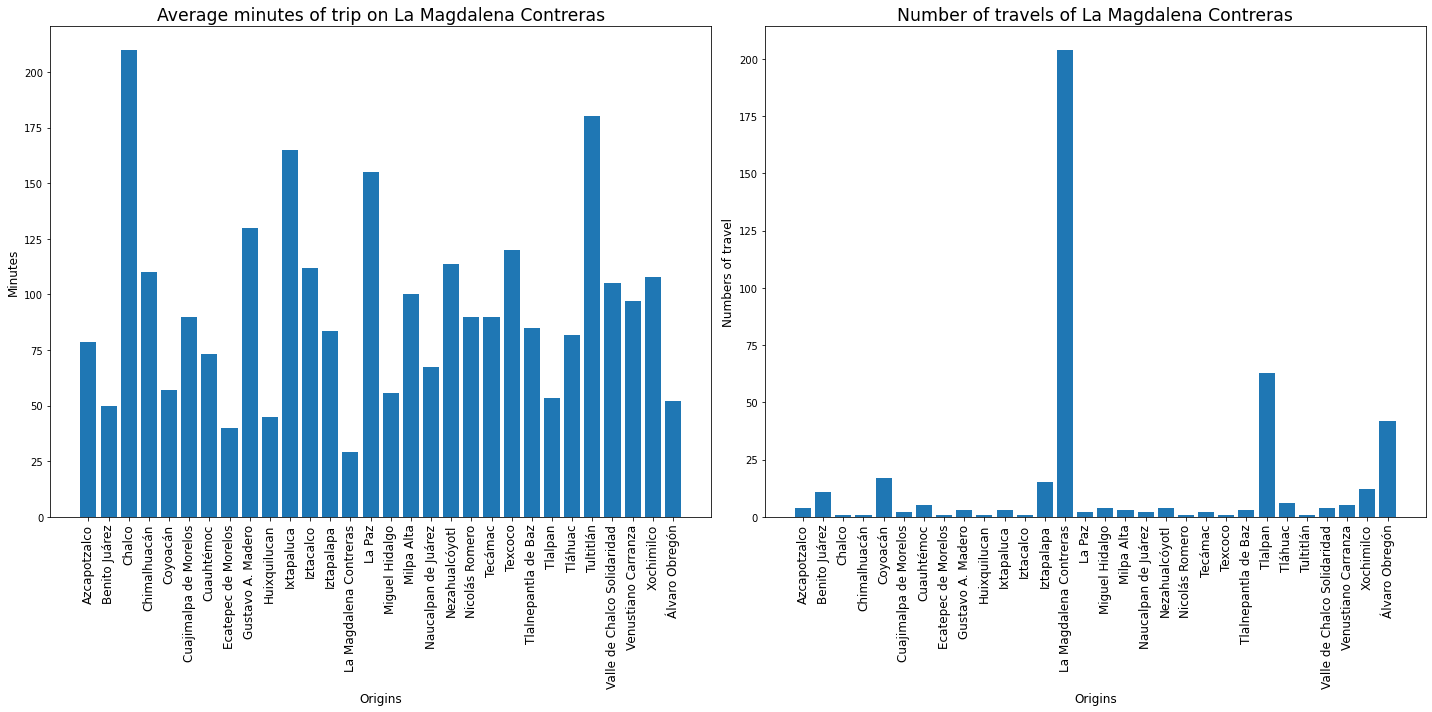

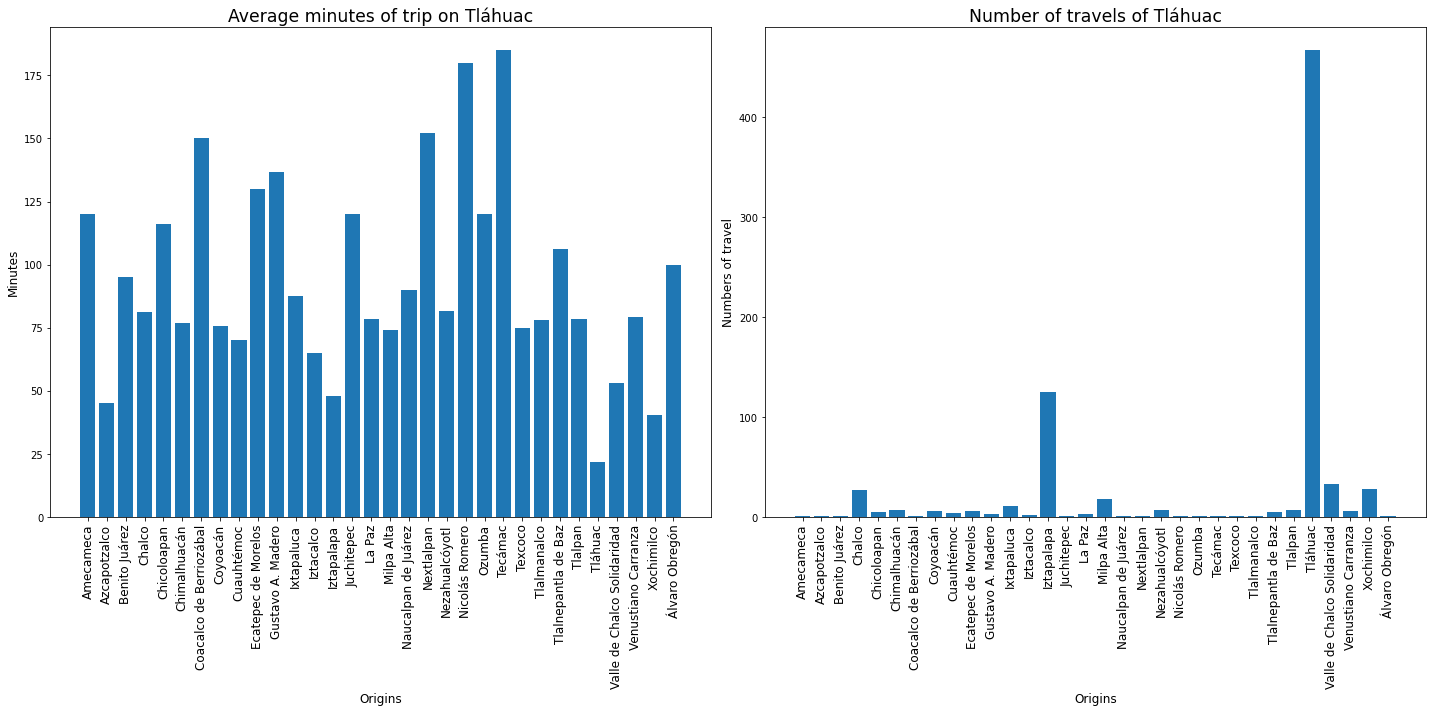

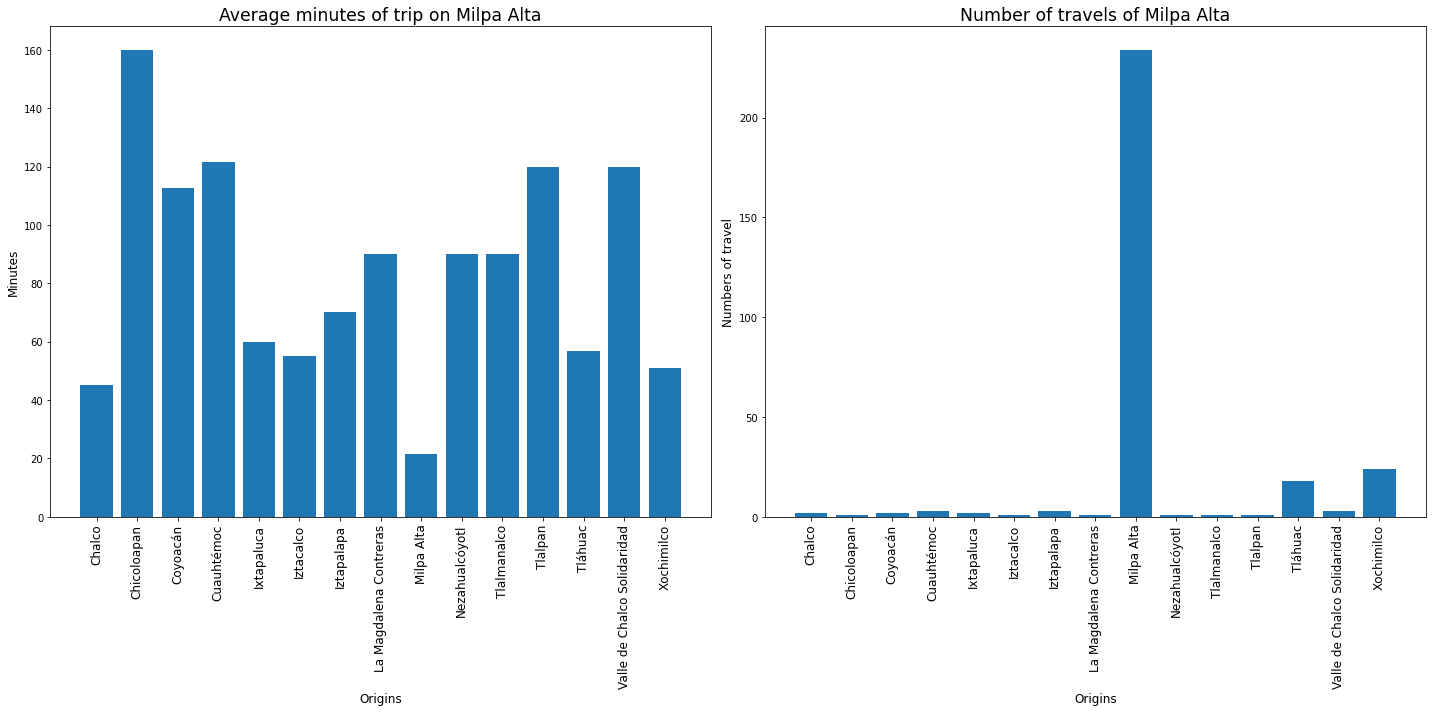

In [27]:
for destination in range(len(Destination_point)):
    if destination!=12:
        try:
            f'''-------------Destinations on: {Destination_point[destination]}---------------------------------------------'''
            series=DataFrame_Destination_Point[destination].groupby(['municipio_origen'])
            minutos_y=series['Minutos transcurridos'].mean()
            minutos_x=[minutos_y.index[i] for i in range(len(minutos_y))]
    
            numbers_y=series['municipio_origen'].count()
            number_x=[numbers_y.index[i] for i in range(len(numbers_y))]
    
            fig_5=plt.figure(figsize=(20,10), tight_layout=True)

            fig_5.add_subplot(1,2,1)
            plt.bar(minutos_x,minutos_y)
            plt.title(f'Average minutes of trip on {Destination_point[destination]}', fontsize='xx-large')
            plt.xticks(minutos_x, rotation='vertical', fontsize='large')
            plt.ylabel('Minutes', fontsize='large')
            plt.xlabel('Origins', fontsize='large')


            fig_5.add_subplot(1,2,2)
            plt.bar(number_x,numbers_y)
            plt.title(f'Number of travels of {Destination_point[destination]}', fontsize='xx-large')
            plt.ylabel('Numbers of travel', fontsize='large')
            plt.xticks(number_x, rotation='vertical', fontsize='large')
            plt.xlabel('Origins', fontsize='large')
            plt.show()
        except:
            continue


In [28]:
#Table with inner travels
Name_origent=[]
Values_route=[]
Total_travels=[]

for origen_point in range(len(Origen_point)):
    name_label=Origen_point[origen_point]
    data=DataFrame_Origen_Point[origen_point]['municipio_destino'].value_counts()
    total_data=int(DataFrame_Origen_Point[origen_point]['municipio_destino'].count())
    
    Name_origent.append(name_label)
    Values_route.append(data)
    Total_travels.append(total_data)


In [29]:
#Table with inner travels
Table_1=pd.DataFrame(Values_route, index=Name_origent)
Table_1['Total travels']=Total_travels
Table_1

,Cuauhtémoc,Miguel Hidalgo,Benito Juárez,Venustiano Carranza,Gustavo A. Madero,Coyoacán,Álvaro Obregón,Azcapotzalco,Iztapalapa,Tlalpan,Iztacalco,Cuajimalpa de Morelos,Xochimilco,La Magdalena Contreras,Tláhuac,Milpa Alta,Total travels
Cuauhtémoc,1237.0,240.0,175.0,112.0,104.0,86.0,63.0,53.0,52.0,43.0,26.0,14.0,6.0,5.0,4.0,3.0,2223
Gustavo A. Madero,792.0,294.0,216.0,200.0,1603.0,97.0,78.0,307.0,59.0,50.0,43.0,45.0,6.0,3.0,3.0,NaN,3796
Xochimilco,119.0,39.0,78.0,17.0,5.0,154.0,28.0,3.0,57.0,179.0,13.0,8.0,662.0,12.0,28.0,24.0,1426
Miguel Hidalgo,226.0,621.0,89.0,27.0,16.0,28.0,63.0,49.0,19.0,23.0,6.0,63.0,3.0,4.0,NaN,NaN,1237
Álvaro Obregón,296.0,304.0,335.0,31.0,33.0,136.0,1122.0,38.0,44.0,112.0,19.0,201.0,13.0,42.0,1.0,NaN,2727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ozumba,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4
Atlautla,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
Temamatla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Tenango del Aire,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3


In [30]:
Table_1=Table_1.sort_values(by='Total travels', ascending=False)
Table_1=Table_1.fillna(0)
Table_1

,Cuauhtémoc,Miguel Hidalgo,Benito Juárez,Venustiano Carranza,Gustavo A. Madero,Coyoacán,Álvaro Obregón,Azcapotzalco,Iztapalapa,Tlalpan,Iztacalco,Cuajimalpa de Morelos,Xochimilco,La Magdalena Contreras,Tláhuac,Milpa Alta,Total travels
Iztapalapa,869.0,287.0,524.0,282.0,112.0,366.0,167.0,77.0,2782.0,179.0,307.0,45.0,66.0,15.0,125.0,3.0,6206
Gustavo A. Madero,792.0,294.0,216.0,200.0,1603.0,97.0,78.0,307.0,59.0,50.0,43.0,45.0,6.0,3.0,3.0,0.0,3796
Álvaro Obregón,296.0,304.0,335.0,31.0,33.0,136.0,1122.0,38.0,44.0,112.0,19.0,201.0,13.0,42.0,1.0,0.0,2727
Tlalpan,253.0,128.0,211.0,23.0,16.0,384.0,207.0,24.0,61.0,933.0,16.0,29.0,56.0,63.0,7.0,1.0,2412
Coyoacán,348.0,177.0,310.0,54.0,25.0,820.0,149.0,36.0,128.0,191.0,28.0,33.0,34.0,17.0,6.0,2.0,2358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Apaxco,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
El Marqués,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Toluca,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Tepetlixpa,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [31]:
#Table without inner travels

Name_origent_without_innerTravels=[]
Values_route_without_innerTravels=[]
Total_travels_without_innerTravels=[]

for origen_point in range(len(Origen_point)):
    data_auxliar=DataFrame_Origen_Point[origen_point]['municipio_destino'].value_counts()
    
   
    name_label_2=Origen_point[origen_point]
    try:
        data_2=data_auxliar.drop(name_label_2)
        inner_travles=int(DataFrame_Origen_Point[origen_point]['municipio_destino'].loc[DataFrame_Origen_Point[origen_point]['municipio_destino']==name_label_2].count())
    
    except:
        
        data_2=data_auxliar
        inner_travles=0
    
      
    
    total_data_2=int(DataFrame_Origen_Point[origen_point]['municipio_destino'].count())
    total_without_inner=total_data_2-inner_travles
    
    Name_origent_without_innerTravels.append(name_label_2)
    Values_route_without_innerTravels.append(data_2)
    Total_travels_without_innerTravels.append(total_without_inner)
    
        




In [32]:
Table_2=pd.DataFrame(Values_route_without_innerTravels, index=Name_origent_without_innerTravels)
Table_2['Total travels']=Total_travels_without_innerTravels
Table_2

,Miguel Hidalgo,Benito Juárez,Venustiano Carranza,Gustavo A. Madero,Coyoacán,Álvaro Obregón,Azcapotzalco,Iztapalapa,Tlalpan,Iztacalco,Cuajimalpa de Morelos,Xochimilco,La Magdalena Contreras,Tláhuac,Milpa Alta,Cuauhtémoc,Total travels
Cuauhtémoc,240.0,175.0,112.0,104.0,86.0,63.0,53.0,52.0,43.0,26.0,14.0,6.0,5.0,4.0,3.0,NaN,986
Gustavo A. Madero,294.0,216.0,200.0,NaN,97.0,78.0,307.0,59.0,50.0,43.0,45.0,6.0,3.0,3.0,NaN,792.0,2193
Xochimilco,39.0,78.0,17.0,5.0,154.0,28.0,3.0,57.0,179.0,13.0,8.0,NaN,12.0,28.0,24.0,119.0,764
Miguel Hidalgo,NaN,89.0,27.0,16.0,28.0,63.0,49.0,19.0,23.0,6.0,63.0,3.0,4.0,NaN,NaN,226.0,616
Álvaro Obregón,304.0,335.0,31.0,33.0,136.0,NaN,38.0,44.0,112.0,19.0,201.0,13.0,42.0,1.0,NaN,296.0,1605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ozumba,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4
Atlautla,NaN,1.0,1.0,1.0,NaN,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9
Temamatla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Tenango del Aire,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [33]:
#Auxiliar to sort values in total destinations to form matrix 3 x 3
Total_destination=[Table_2[column].sum() for column in Table_2.columns]
Total_destination=pd.Series(Total_destination, index=Table_2.columns)
Total_destination=Total_destination.drop('Total travels')
Total_destination=Total_destination.sort_values(ascending=False)
Total_destination=pd.DataFrame(Total_destination)
new_orden=[n for n in Total_destination.index]
new_orden.append('Total travels')


In [34]:
Table_2=Table_2.sort_values(by='Total travels', ascending=False)
Table_2=Table_2.fillna(0)
Table_2

,Miguel Hidalgo,Benito Juárez,Venustiano Carranza,Gustavo A. Madero,Coyoacán,Álvaro Obregón,Azcapotzalco,Iztapalapa,Tlalpan,Iztacalco,Cuajimalpa de Morelos,Xochimilco,La Magdalena Contreras,Tláhuac,Milpa Alta,Cuauhtémoc,Total travels
Iztapalapa,287.0,524.0,282.0,112.0,366.0,167.0,77.0,0.0,179.0,307.0,45.0,66.0,15.0,125.0,3.0,869.0,3424
Gustavo A. Madero,294.0,216.0,200.0,0.0,97.0,78.0,307.0,59.0,50.0,43.0,45.0,6.0,3.0,3.0,0.0,792.0,2193
Ecatepec de Morelos,188.0,140.0,183.0,515.0,93.0,75.0,175.0,69.0,28.0,33.0,31.0,10.0,1.0,6.0,0.0,597.0,2144
Nezahualcóyotl,165.0,131.0,245.0,182.0,87.0,67.0,48.0,244.0,46.0,133.0,26.0,9.0,4.0,7.0,1.0,503.0,1898
Álvaro Obregón,304.0,335.0,31.0,33.0,136.0,0.0,38.0,44.0,112.0,19.0,201.0,13.0,42.0,1.0,0.0,296.0,1605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Apaxco,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Tehuacán,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
El Marqués,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Tepetlixpa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [35]:
Table_2=Table_2[new_orden]
Table_2

,Cuauhtémoc,Miguel Hidalgo,Benito Juárez,Coyoacán,Iztapalapa,Gustavo A. Madero,Venustiano Carranza,Álvaro Obregón,Azcapotzalco,Tlalpan,Iztacalco,Cuajimalpa de Morelos,Xochimilco,Tláhuac,La Magdalena Contreras,Milpa Alta,Total travels
Iztapalapa,869.0,287.0,524.0,366.0,0.0,112.0,282.0,167.0,77.0,179.0,307.0,45.0,66.0,125.0,15.0,3.0,3424
Gustavo A. Madero,792.0,294.0,216.0,97.0,59.0,0.0,200.0,78.0,307.0,50.0,43.0,45.0,6.0,3.0,3.0,0.0,2193
Ecatepec de Morelos,597.0,188.0,140.0,93.0,69.0,515.0,183.0,75.0,175.0,28.0,33.0,31.0,10.0,6.0,1.0,0.0,2144
Nezahualcóyotl,503.0,165.0,131.0,87.0,244.0,182.0,245.0,67.0,48.0,46.0,133.0,26.0,9.0,7.0,4.0,1.0,1898
Álvaro Obregón,296.0,304.0,335.0,136.0,44.0,33.0,31.0,0.0,38.0,112.0,19.0,201.0,13.0,1.0,42.0,0.0,1605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Apaxco,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Tehuacán,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
El Marqués,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Tepetlixpa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Matrix to obtein target to API

In [36]:
# Makig matrix with to obtain most target to API by municipio
api_columns=[]
for column in range(0,m_destinations):
    api_columns.append(new_orden[column])

API_Municipio_Traget=Table_2[api_columns].head(n_origens)
API_Municipio_Traget

,Cuauhtémoc,Miguel Hidalgo,Benito Juárez
Iztapalapa,869.0,287.0,524.0
Gustavo A. Madero,792.0,294.0,216.0
Ecatepec de Morelos,597.0,188.0,140.0


In [37]:
Target_DataFrame_Origen=[]
Target_DataFrame_Destination=[]

for origen_ranked in API_Municipio_Traget.index:
    Target_DataFrame_Origen.append(CDMX_Destinations.loc[CDMX_Destinations['municipio_origen']==origen_ranked])

for destination_ranked in API_Municipio_Traget.columns:
    Target_DataFrame_Destination.append(CDMX_Destinations.loc[CDMX_Destinations['municipio_destino']==destination_ranked])

In [38]:
#Routes target to use API

Colonias_origen=[]
Colonias_destino=[]
Alcaldia_origen=[]
Alcaldia_destino=[]
Start_point=[]
End_point=[]

for origen_municipio in range(len(API_Municipio_Traget.index)):
         
        alcaldia_origen=API_Municipio_Traget.index[origen_municipio]
        Edo_origen=Target_DataFrame_Origen[origen_municipio]['estado_origen'].unique()[0]
        
    
        for destino_municipio in range(len(API_Municipio_Traget.columns)):
        
            alcaldia_destino=API_Municipio_Traget.columns[destino_municipio]
                        
            auxiliar_route=Target_DataFrame_Origen[origen_municipio].loc[Target_DataFrame_Origen[origen_municipio]['municipio_destino']==alcaldia_destino][['colonia_origen','colonia_destino']]
            routes=auxiliar_route.value_counts()
            index_route=routes.index[0]
            colonia_origen=index_route[0]
            colonia_destino=index_route[1]
            start_point=f'colonia {colonia_origen}, {alcaldia_origen}, {Edo_origen}'
            end_point=f'colonia {colonia_destino}, {alcaldia_destino}, CDMX'
            
            
            Colonias_origen.append(colonia_origen)
            Colonias_destino.append(colonia_destino)
            Alcaldia_origen.append(alcaldia_origen)
            Alcaldia_destino.append(alcaldia_destino)
            Start_point.append(start_point)
            End_point.append(end_point)

Colonias_Target_API=pd.DataFrame({
    'Colonia_origen':Colonias_origen,
    'Colonia_destino':Colonias_destino,
    'Municipio_origen':Alcaldia_origen,
    'Municipio_destino':Alcaldia_destino,
    'Start_travel':Start_point,
    'End_travel':End_point
})        


In [39]:
Colonias_Target_API

,Colonia_origen,Colonia_destino,Municipio_origen,Municipio_destino,Start_travel,End_travel
0,Santa Martha Acatitla,Centro Histórico,Iztapalapa,Cuauhtémoc,"colonia Santa Martha Acatitla, Iztapalapa, Ciu...","colonia Centro Histórico, Cuauhtémoc, CDMX"
1,UAM Iztapalapa,Chapultepec-Polanco,Iztapalapa,Miguel Hidalgo,"colonia UAM Iztapalapa, Iztapalapa, Ciudad de ...","colonia Chapultepec-Polanco, Miguel Hidalgo, CDMX"
2,Lomas Estrella,Del Valle,Iztapalapa,Benito Juárez,"colonia Lomas Estrella, Iztapalapa, Ciudad de ...","colonia Del Valle, Benito Juárez, CDMX"
3,Bondojito,Centro Histórico,Gustavo A. Madero,Cuauhtémoc,"colonia Bondojito, Gustavo A. Madero, Ciudad d...","colonia Centro Histórico, Cuauhtémoc, CDMX"
4,Bondojito,Chapultepec-Polanco,Gustavo A. Madero,Miguel Hidalgo,"colonia Bondojito, Gustavo A. Madero, Ciudad d...","colonia Chapultepec-Polanco, Miguel Hidalgo, CDMX"
5,La Villa,Napoles,Gustavo A. Madero,Benito Juárez,"colonia La Villa, Gustavo A. Madero, Ciudad de...","colonia Napoles, Benito Juárez, CDMX"
6,CC Center Plazas-Nueva Aragón,Centro Histórico,Ecatepec de Morelos,Cuauhtémoc,"colonia CC Center Plazas-Nueva Aragón, Ecatepe...","colonia Centro Histórico, Cuauhtémoc, CDMX"
7,CC Center Plazas-Nueva Aragón,Chapultepec-Polanco,Ecatepec de Morelos,Miguel Hidalgo,"colonia CC Center Plazas-Nueva Aragón, Ecatepe...","colonia Chapultepec-Polanco, Miguel Hidalgo, CDMX"
8,Jardines de Morelos,Portales,Ecatepec de Morelos,Benito Juárez,"colonia Jardines de Morelos, Ecatepec de Morel...","colonia Portales, Benito Juárez, CDMX"


In [40]:
Colonias_Target_API.to_excel('Colonias_Target_API.xlsx')

## Hours start and end of travels

### Hours start by top startes

In [41]:
Top_Hours=CDMX_Destinations['Star time'].value_counts().head(15)
Top_Hours=Top_Hours.index

In [42]:
FramesHoursStart=[]
for hour in Top_Hours:
    FramesHoursStart.append(CDMX_Destinations.loc[CDMX_Destinations['Star time']==hour])  

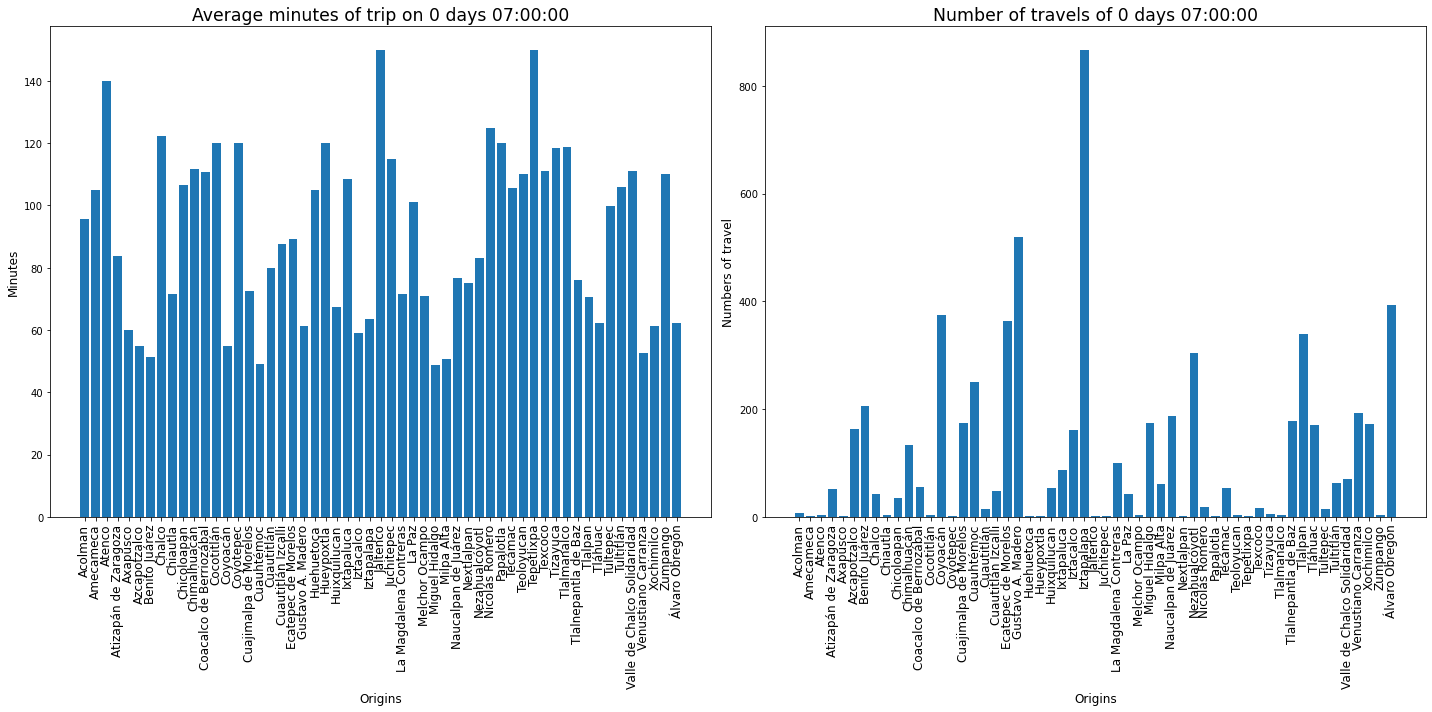

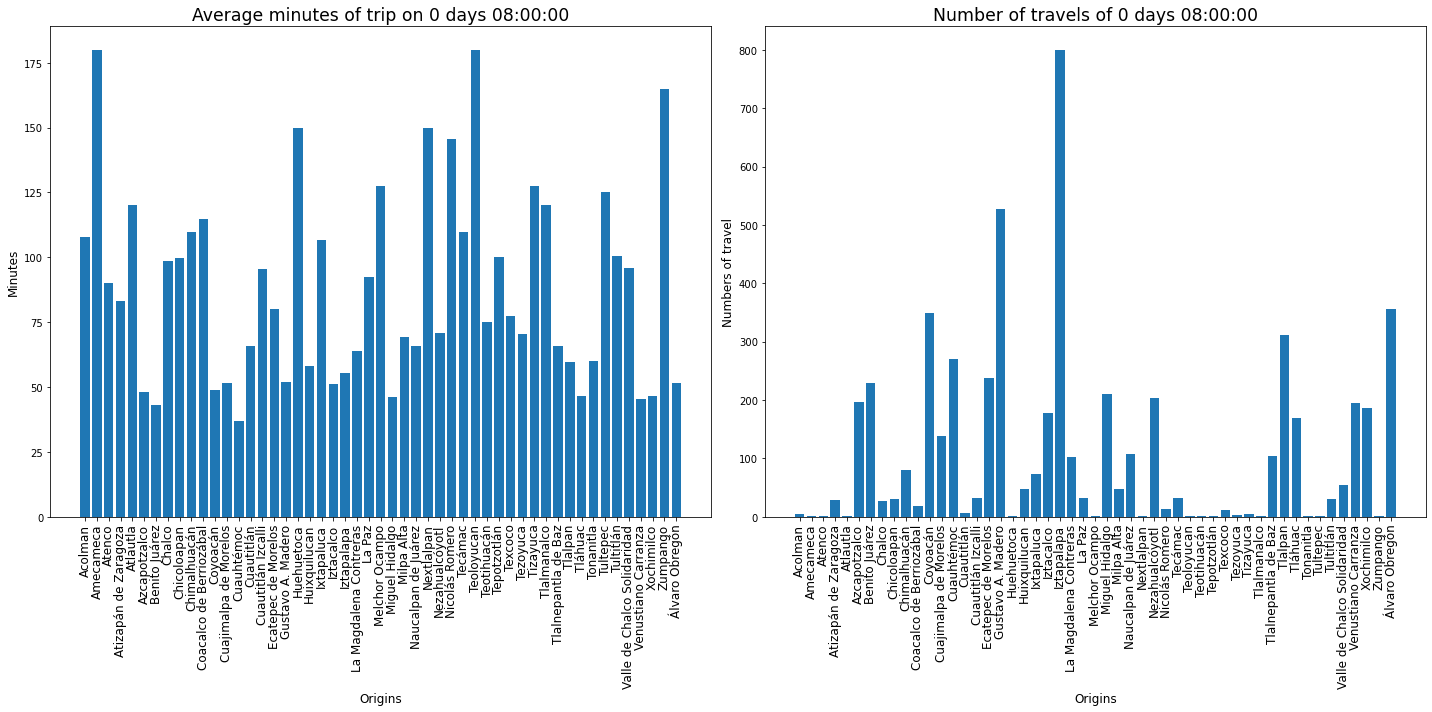

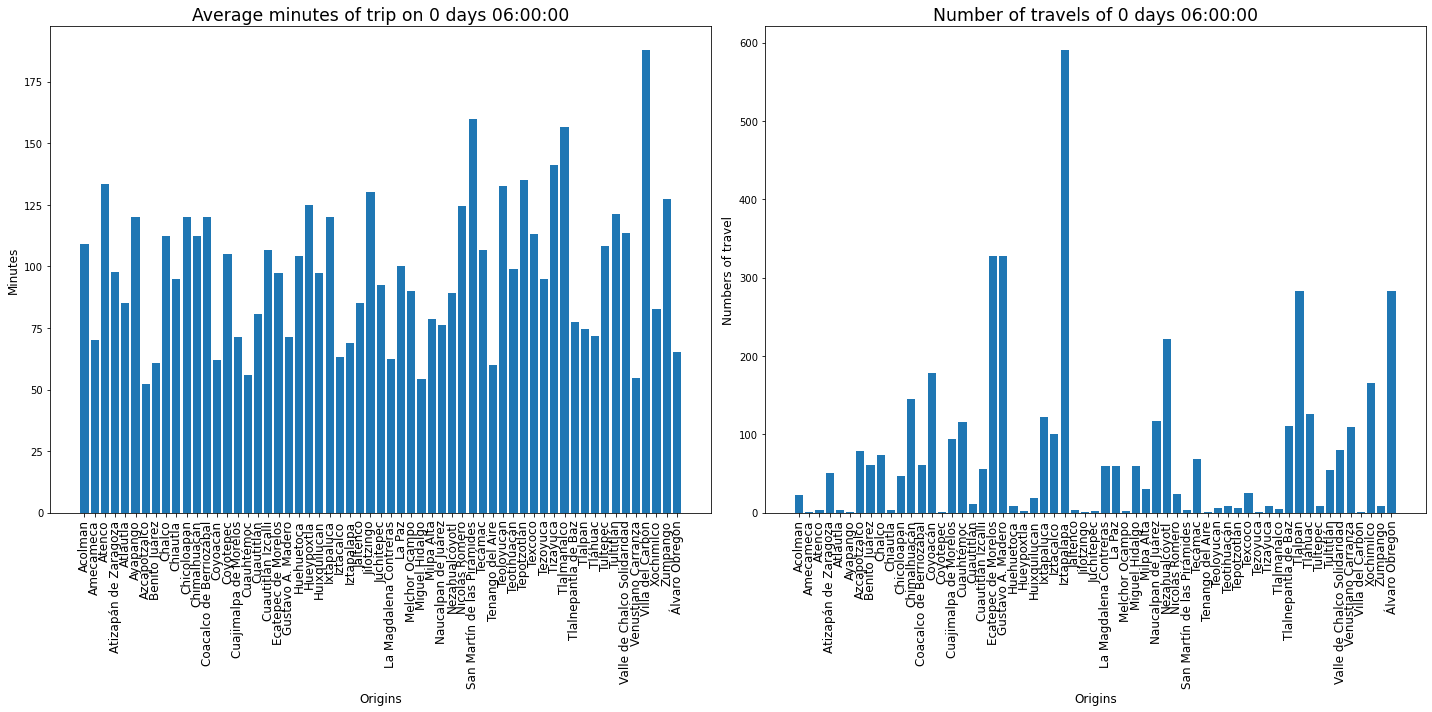

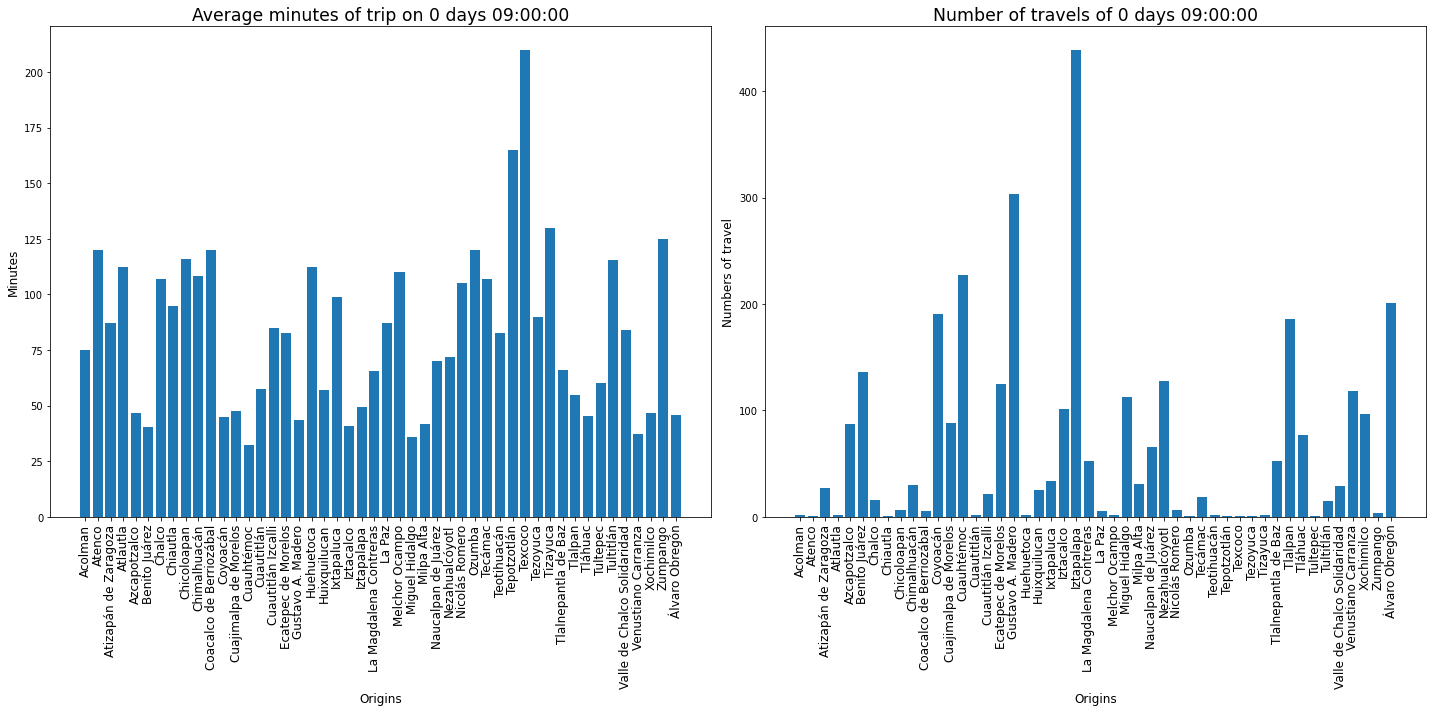

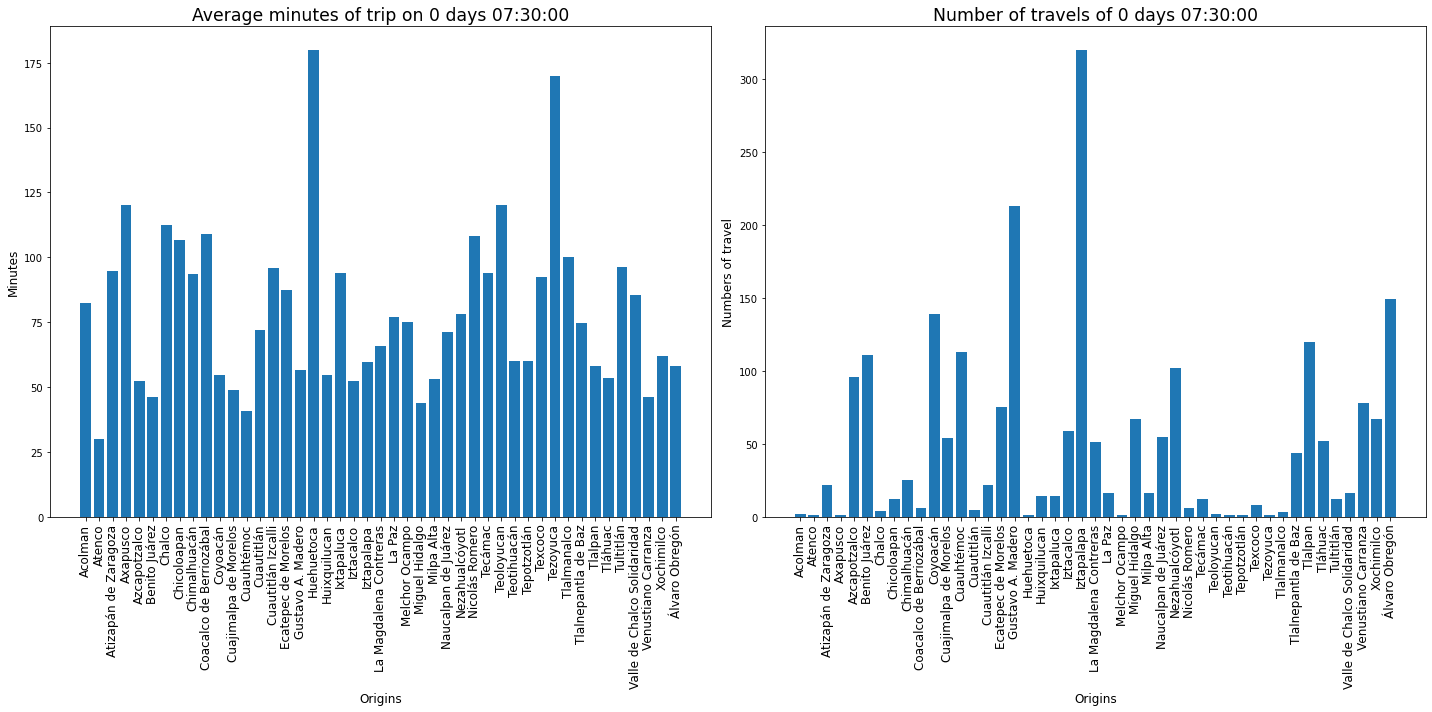

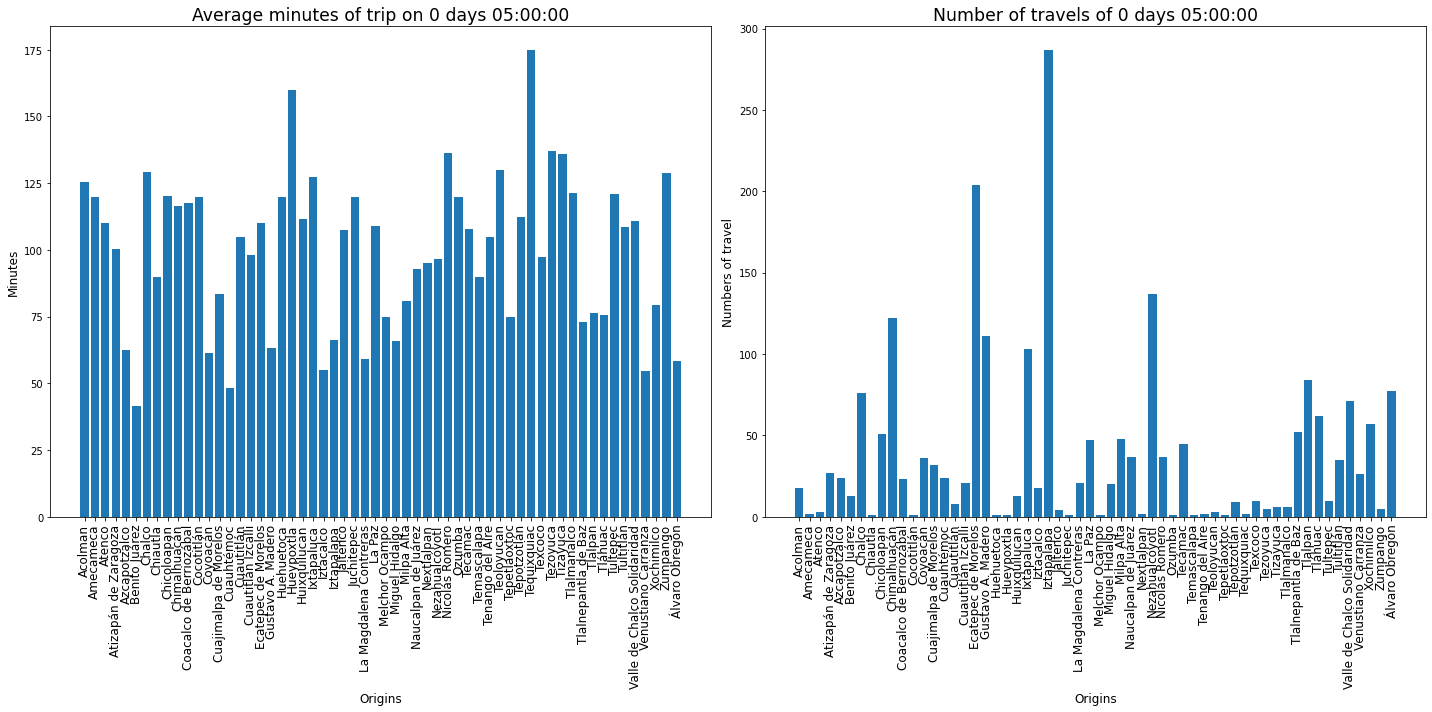

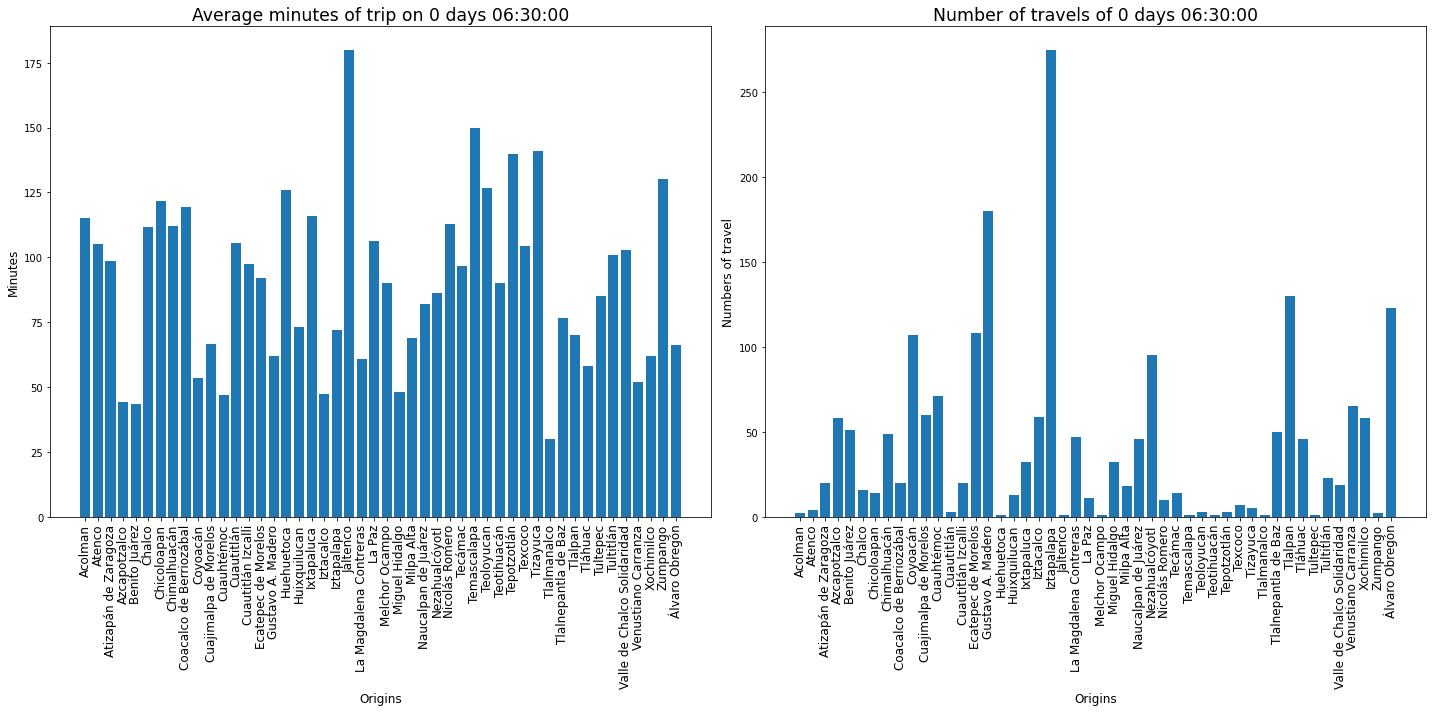

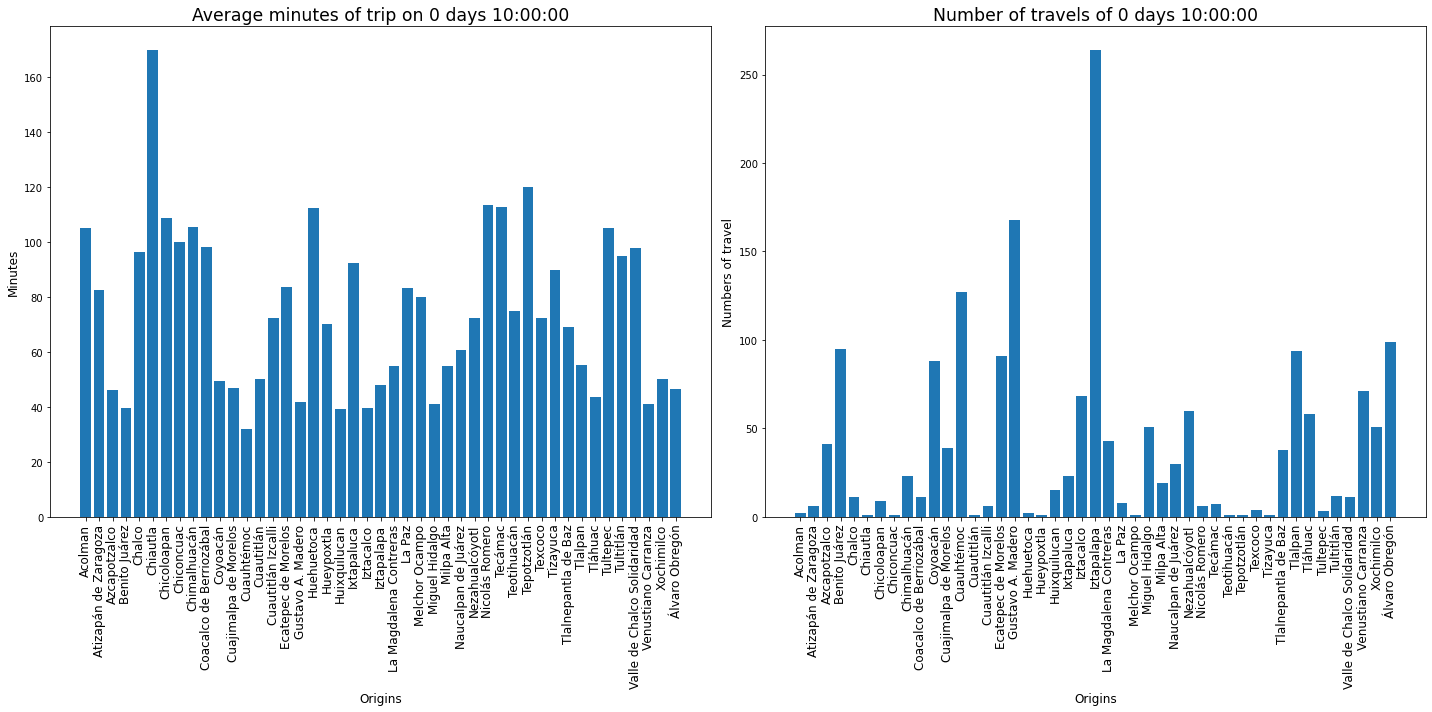

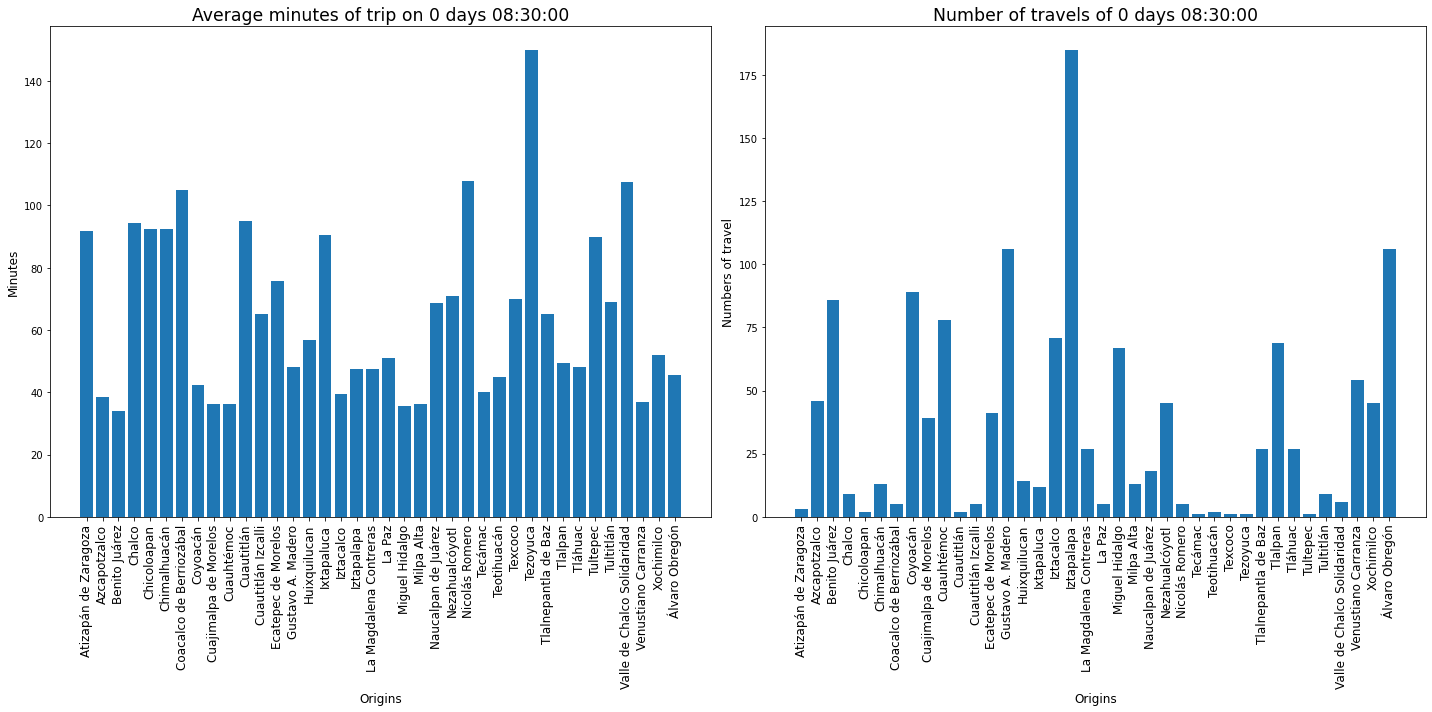

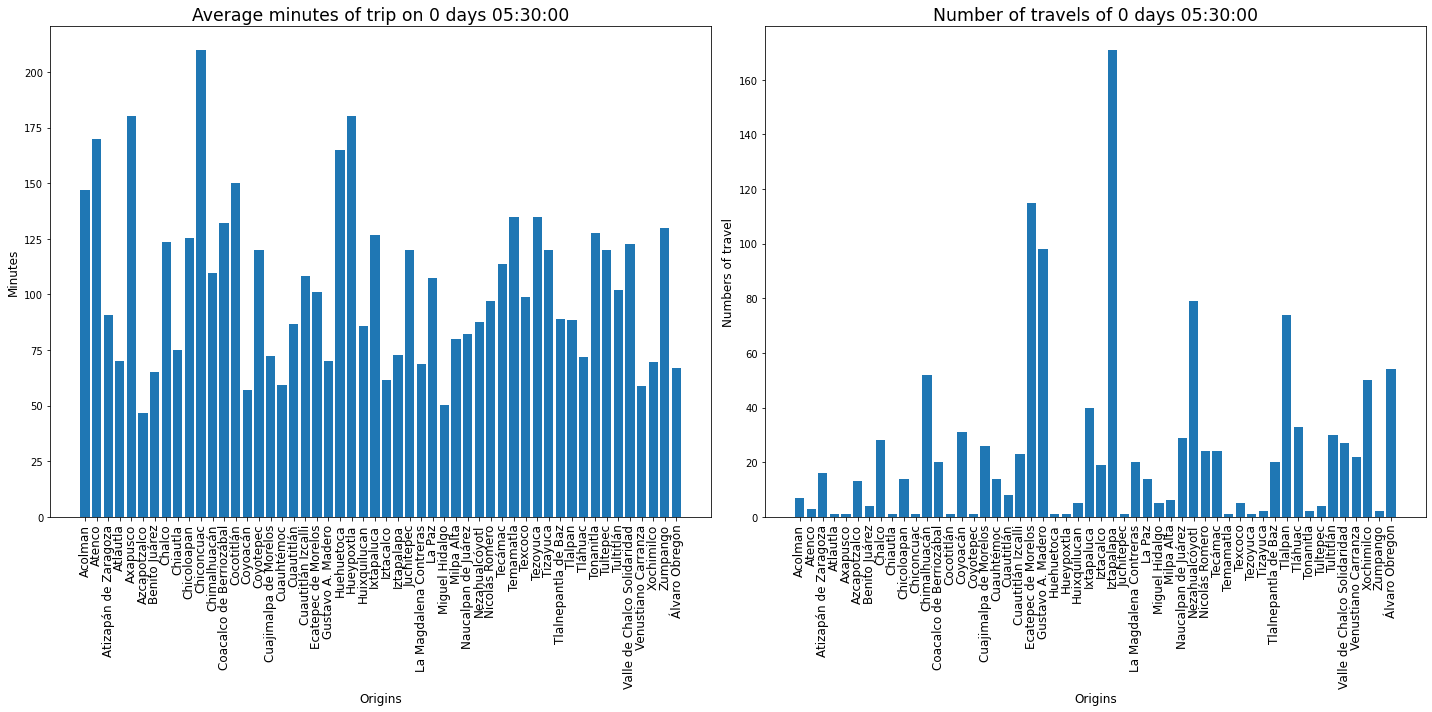

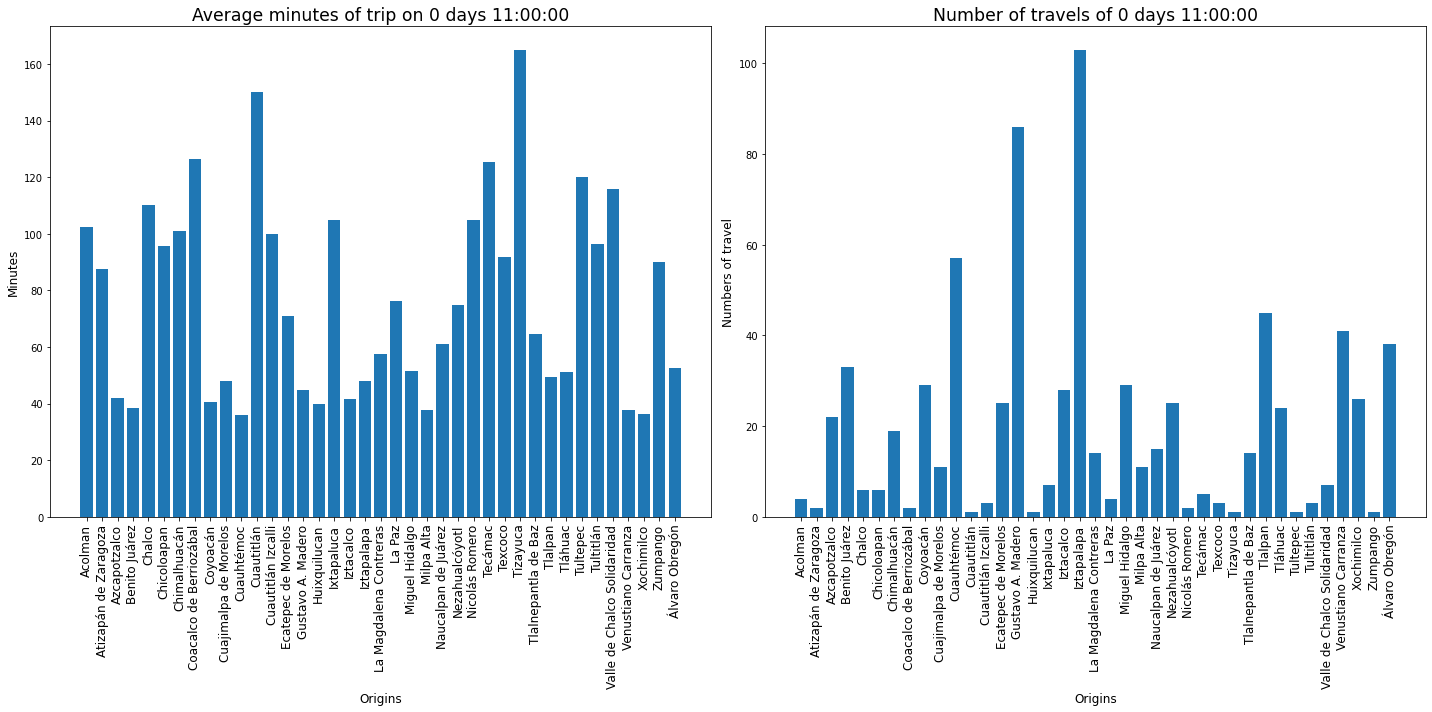

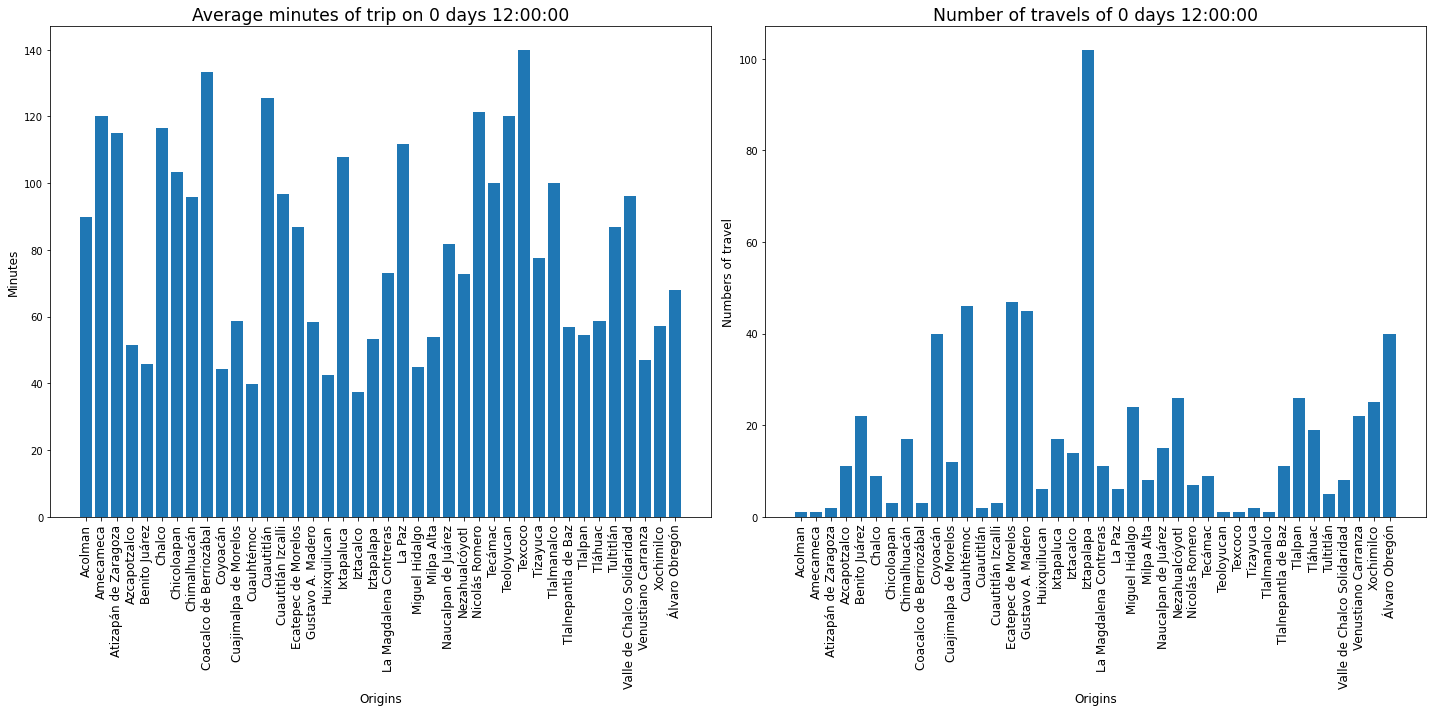

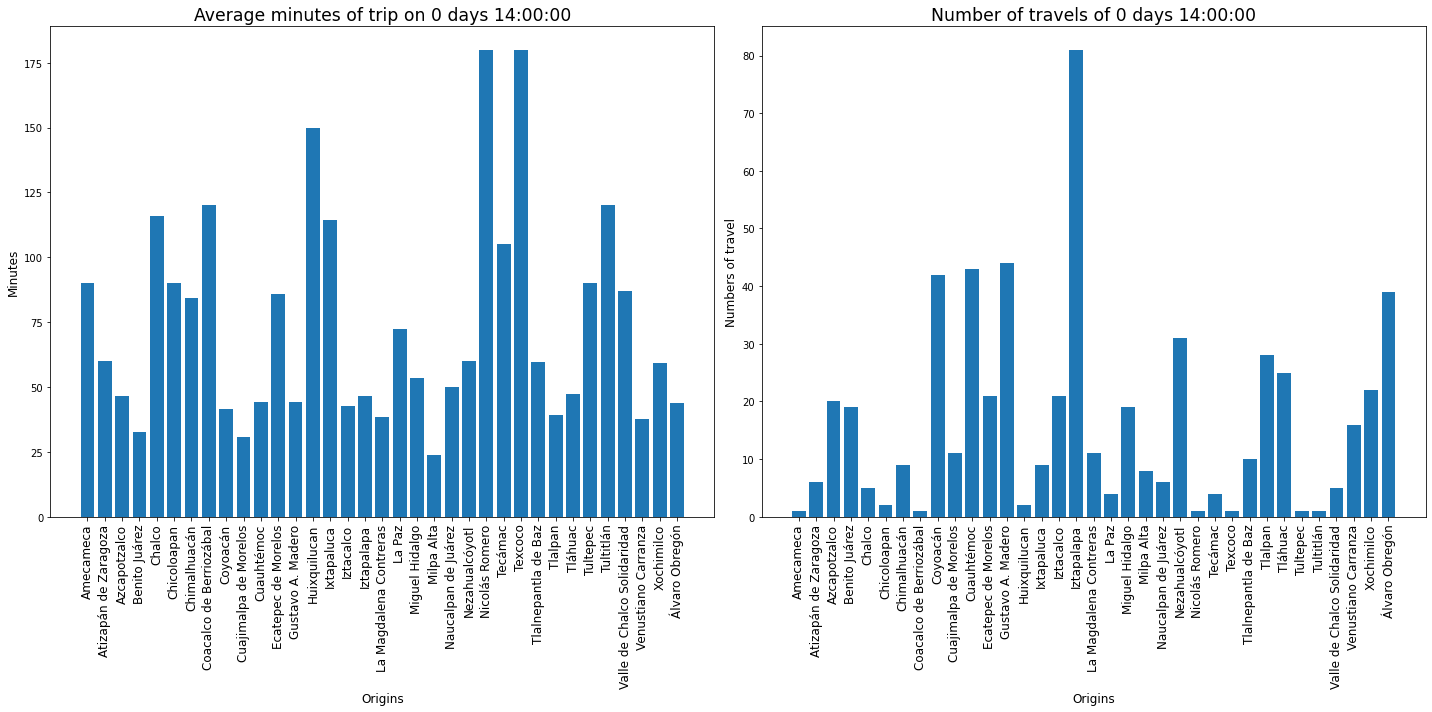

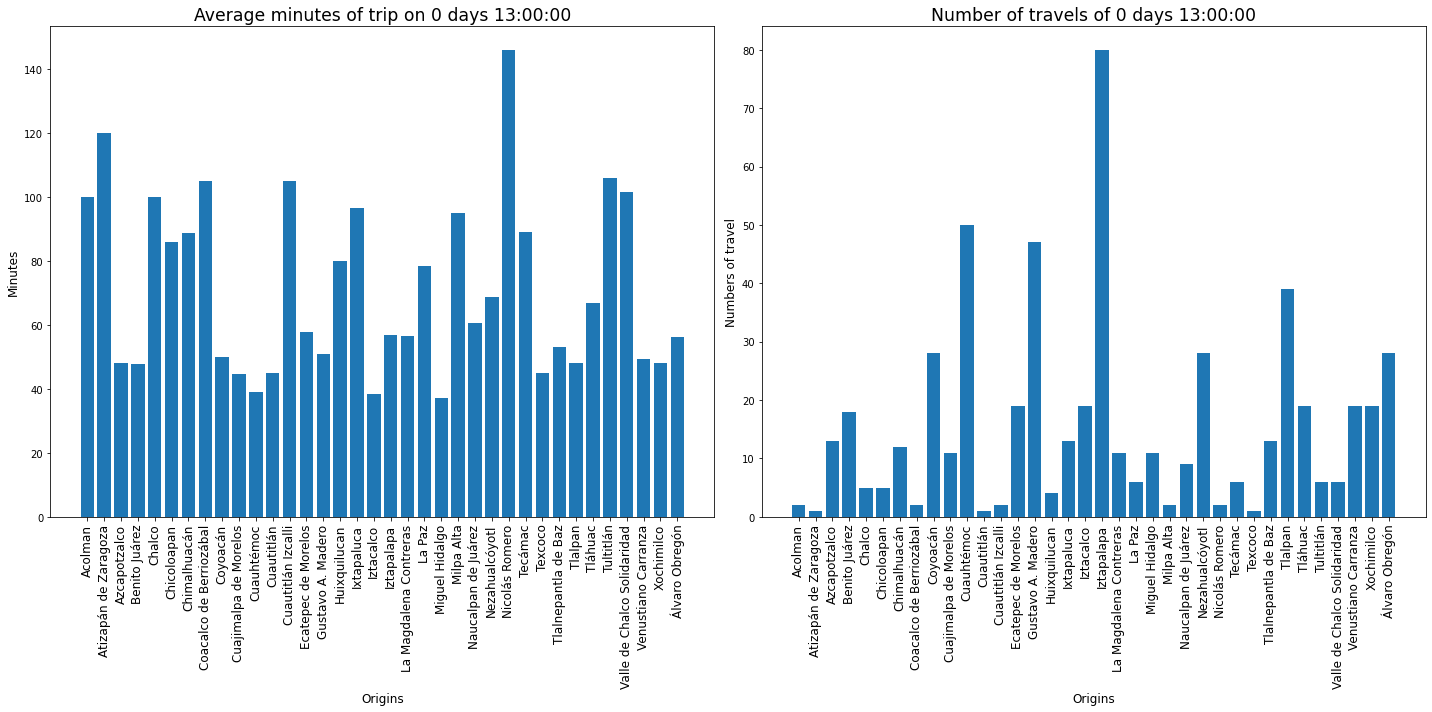

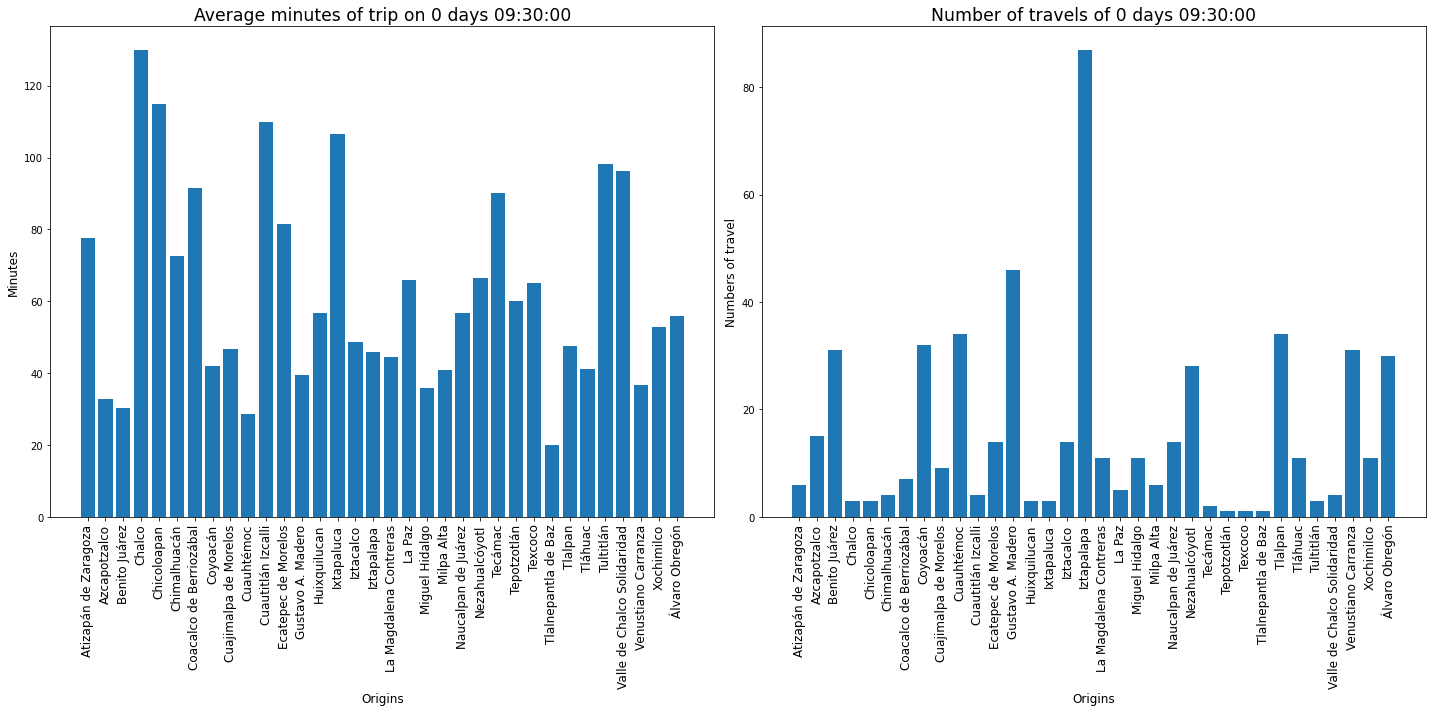

In [43]:
for hour in range(len(Top_Hours)):
    try:
        f'''-------------Travels on: {Top_Hours[hour]}---------------------------------------------'''
        series=FramesHoursStart[hour].groupby(['municipio_origen'])
        minutos_yt=series['Minutos transcurridos'].mean()
        minutos_xt=[minutos_yt.index[i] for i in range(len(minutos_yt))]
    
        numbers_yt=series['municipio_origen'].count()
        number_xt=[numbers_yt.index[i] for i in range(len(numbers_yt))]
    
        fig_7=plt.figure(figsize=(20,10), tight_layout=True)

        fig_7.add_subplot(1,2,1)
        plt.bar(minutos_xt,minutos_yt)
        plt.title(f'Average minutes of trip on {Top_Hours[hour]}', fontsize='xx-large')
        plt.xticks(minutos_xt, rotation='vertical', fontsize='large')
        plt.ylabel('Minutes', fontsize='large')
        plt.xlabel('Origins', fontsize='large')


        fig_7.add_subplot(1,2,2)
        plt.bar(number_xt,numbers_yt)
        plt.title(f'Number of travels of {Top_Hours[hour]}', fontsize='xx-large')
        plt.ylabel('Numbers of travel', fontsize='large')
        plt.xticks(number_xt, rotation='vertical', fontsize='large')
        plt.xlabel('Origins', fontsize='large')
        plt.show()
    except:
        continue

### Hours start and end in the target API

In [44]:
Target_DataFrame_Destination[2]['municipio_destino'].unique()[0]

'Benito Juárez'

----------------------------------trip for: Iztapalapa to Cuauhtémoc---------------------------
                                         travel average 80.25 minutes                                                      


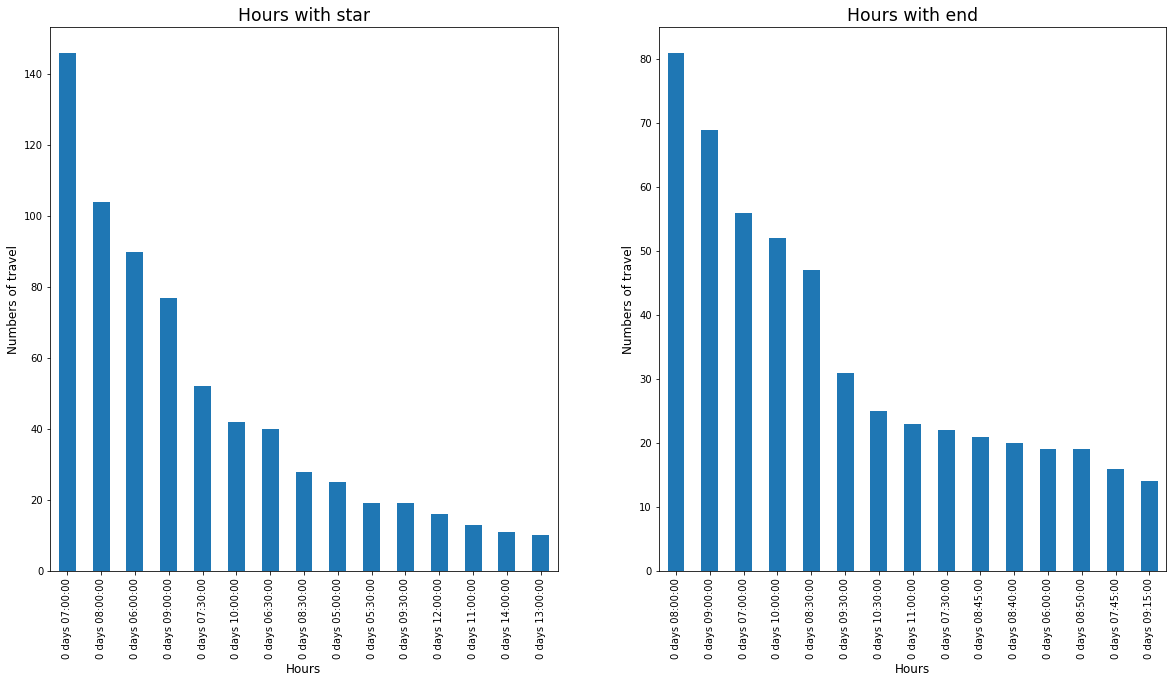

----------------------------------trip for: Gustavo A. Madero to Cuauhtémoc---------------------------
                                         travel average 63.95 minutes                                                      


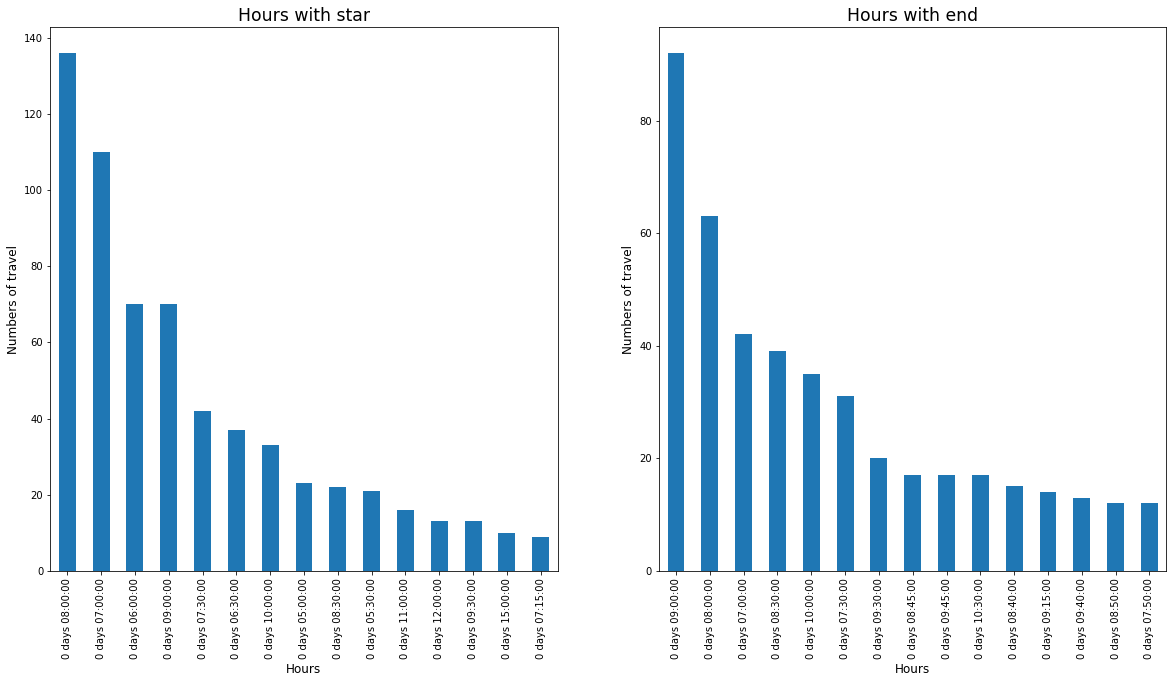

----------------------------------trip for: Ecatepec de Morelos to Cuauhtémoc---------------------------
                                         travel average 91.97 minutes                                                      


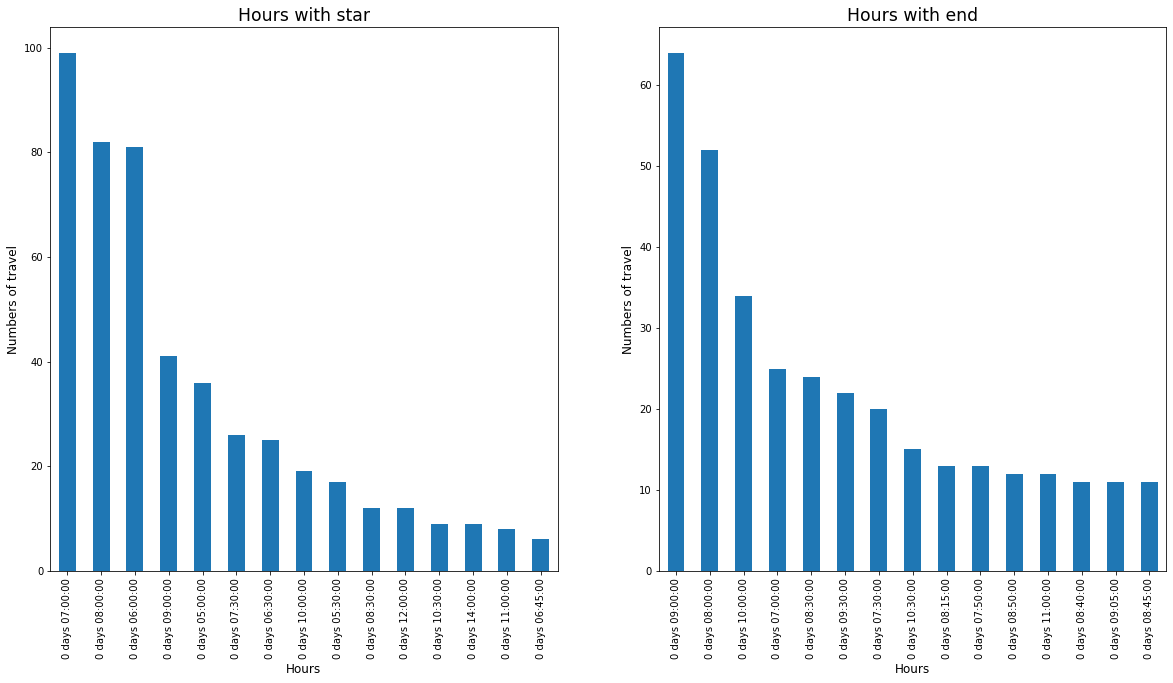

----------------------------------trip for: Iztapalapa to Miguel Hidalgo---------------------------
                                         travel average 93.7 minutes                                                      


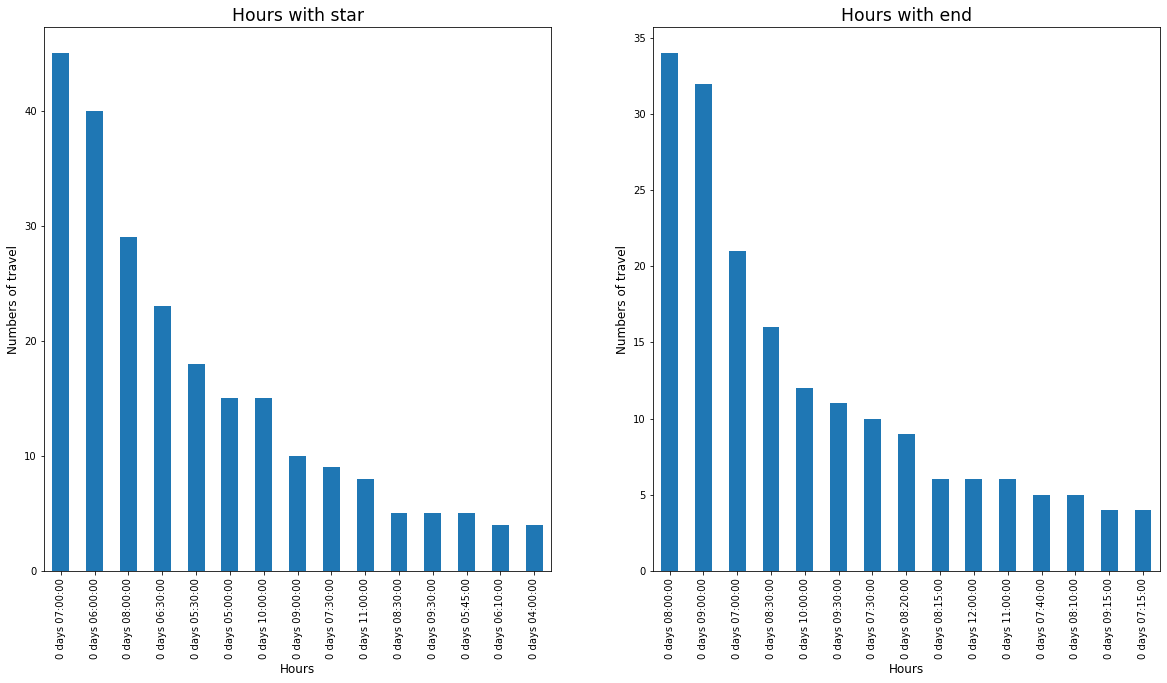

----------------------------------trip for: Gustavo A. Madero to Miguel Hidalgo---------------------------
                                         travel average 83.94 minutes                                                      


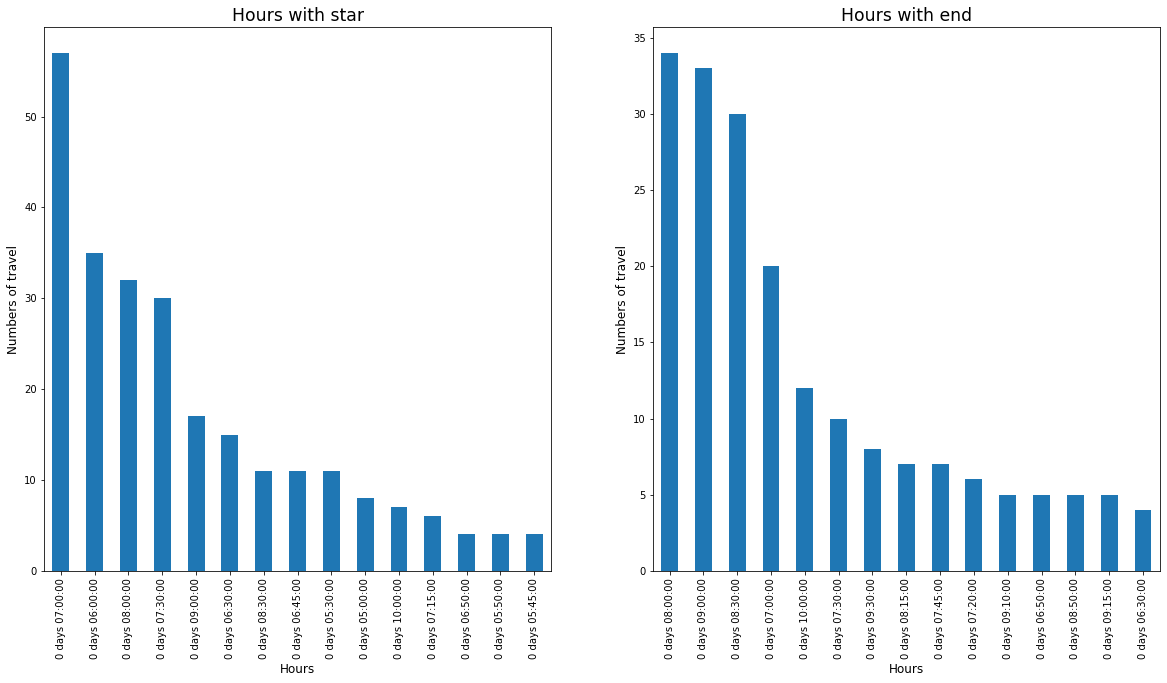

----------------------------------trip for: Ecatepec de Morelos to Miguel Hidalgo---------------------------
                                         travel average 110.87 minutes                                                      


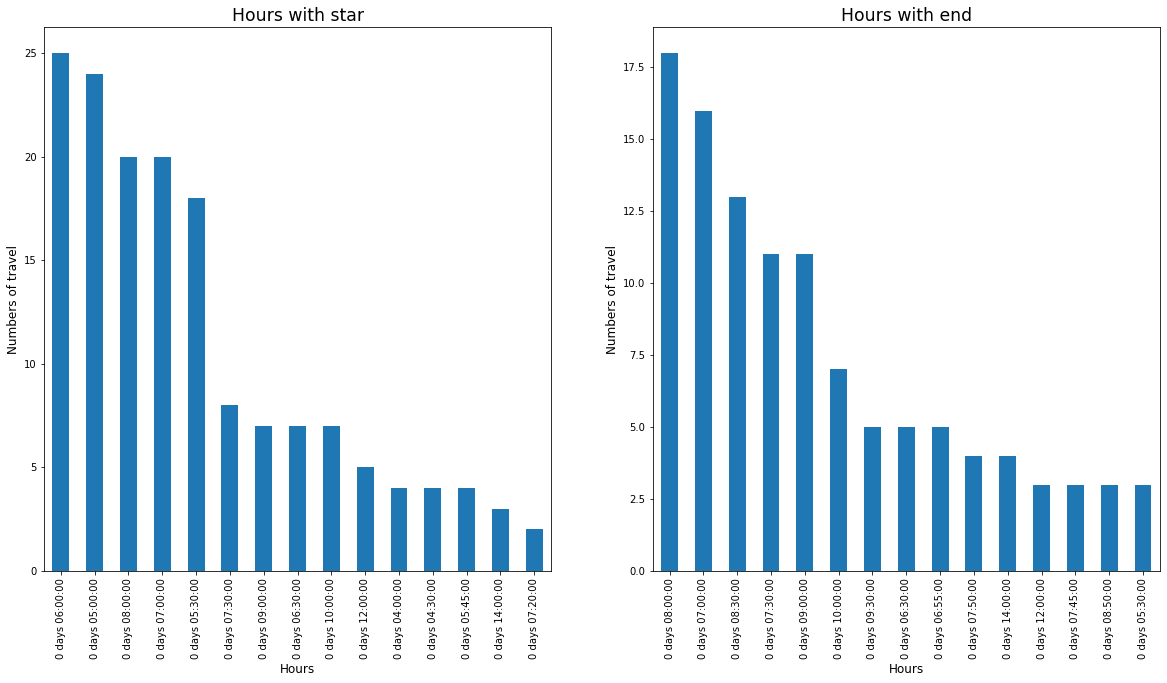

----------------------------------trip for: Iztapalapa to Benito Juárez---------------------------
                                         travel average 70.63 minutes                                                      


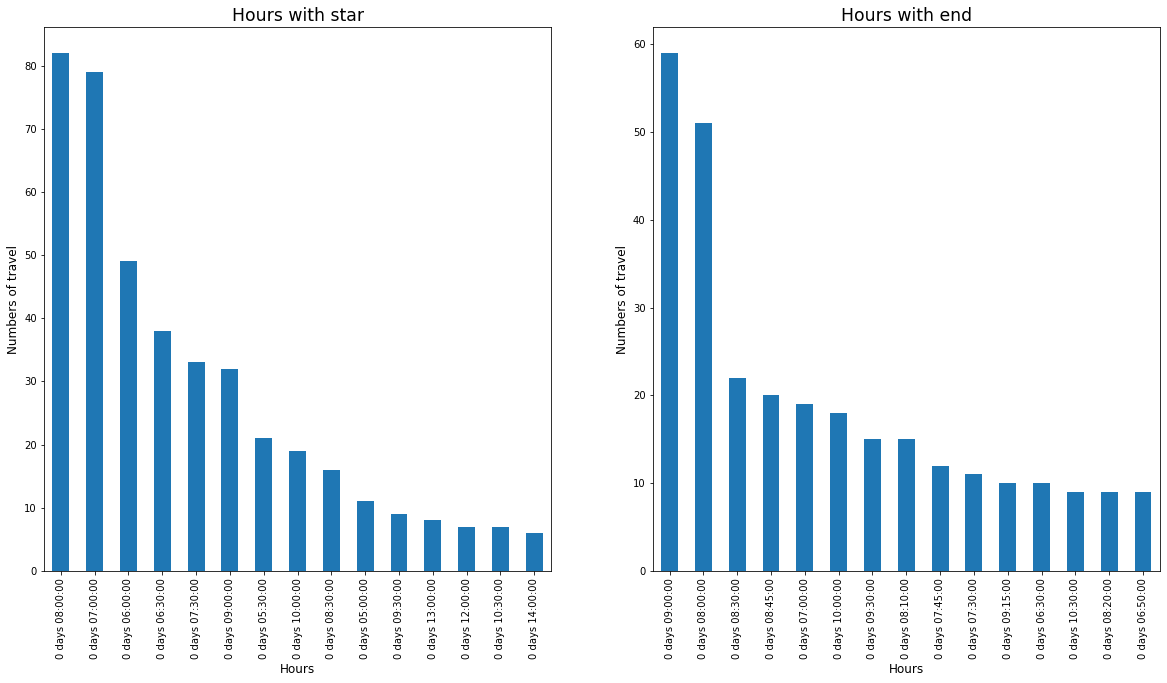

----------------------------------trip for: Gustavo A. Madero to Benito Juárez---------------------------
                                         travel average 79.68 minutes                                                      


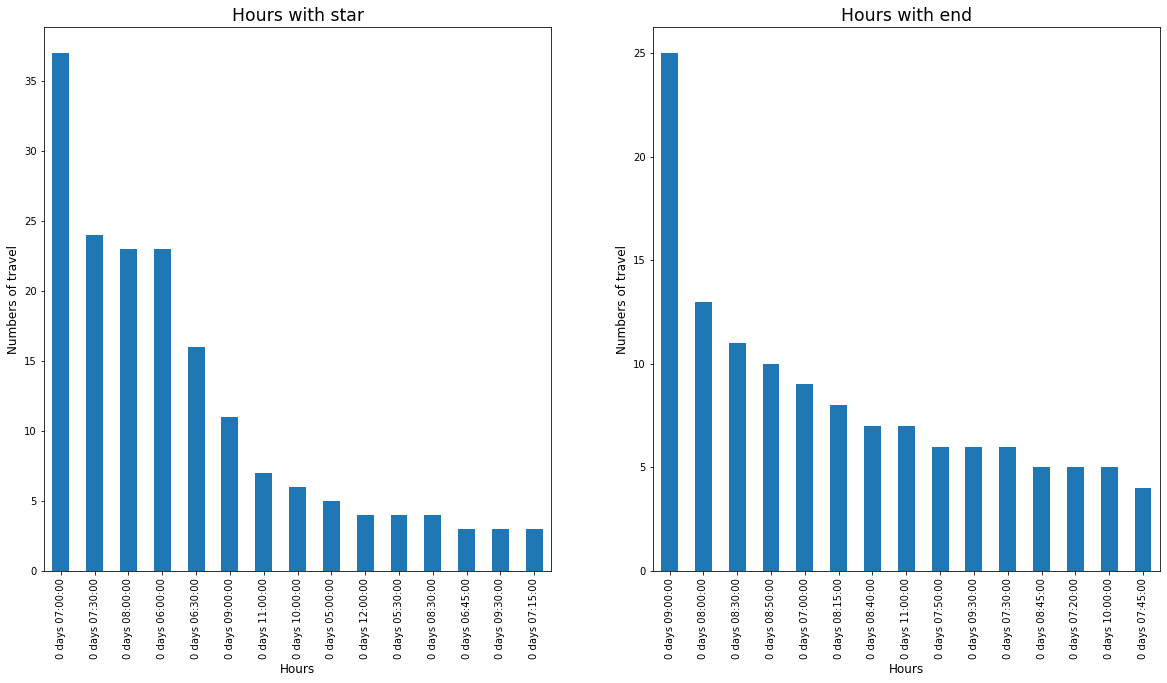

----------------------------------trip for: Ecatepec de Morelos to Benito Juárez---------------------------
                                         travel average 110.54 minutes                                                      


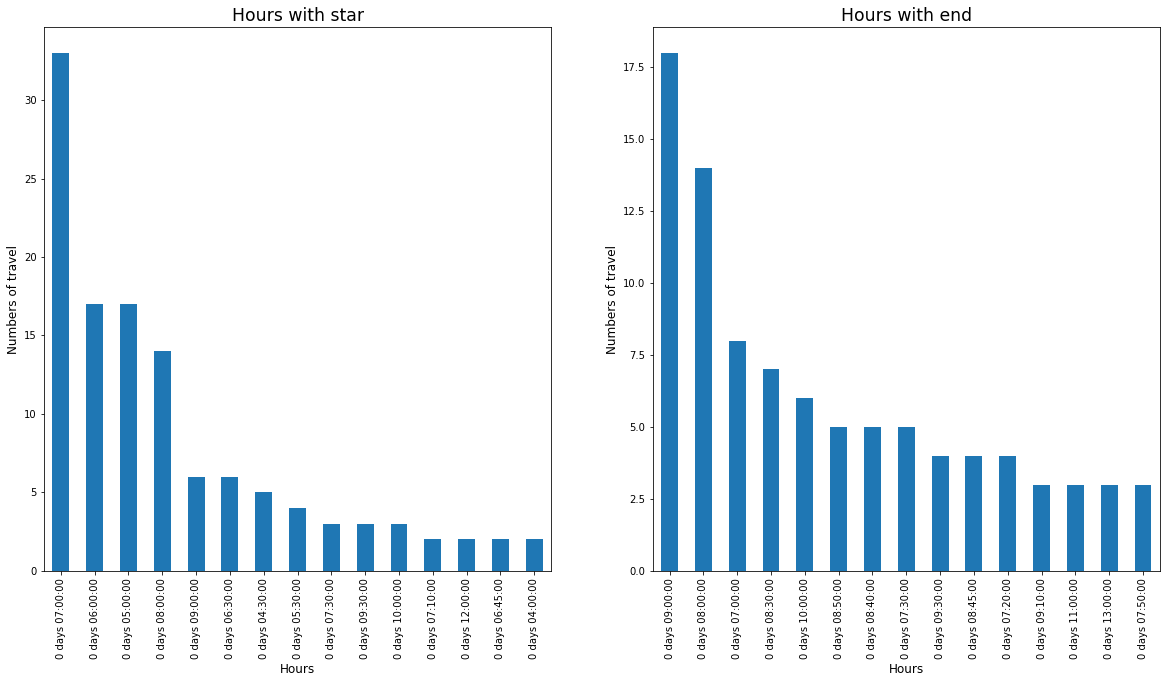

In [45]:
#Target_DataFrame_Origen
#Target_DataFrame_Destination


for municipio_destino in range(len(Target_DataFrame_Destination)):
    target=Target_DataFrame_Destination[municipio_destino]['municipio_destino'].unique()[0]
    
    series=CDMX_Destinations.loc[CDMX_Destinations['municipio_destino']==target]
    
    for municipio_origen in range(len(Target_DataFrame_Origen)):
       
        target_2=Target_DataFrame_Origen[municipio_origen]['municipio_origen'].unique()[0]
        
        series_2=series.loc[series['municipio_origen']==target_2]['Star time'].value_counts()
        series_3=series.loc[series['municipio_origen']==target_2]['End time'].value_counts()
        mean=series.loc[series['municipio_origen']==target_2]['Minutos transcurridos'].mean()
        #Change len deped of number of data in series_2
        if len(series_2)>15:
            long=15
        else:
            if len(series_2)>0:
                long=len(series_2)
        #Change len deped of number of data in series_3
        if len(series_3)>15:
            long_2=15
        else:
            if len(series_3)>0:
                long_2=len(series_3)        
        try:
            fig_8=plt.figure(figsize=(20,10), tight_layout=False)
            
            print(f'''----------------------------------trip for: {target_2} to {target}---------------------------
                                         travel average {round(mean,2)} minutes                                                      ''')
            fig_8.add_subplot(1,2,1)
            series_2.head(long).plot(kind='bar')
            plt.title(f'Hours with star', fontsize='xx-large')
            plt.ylabel('Numbers of travel', fontsize='large')
            plt.xlabel('Hours', fontsize='large')
            
            
            fig_8.add_subplot(1,2,2)
            series_3.head(long_2).plot(kind='bar')
            plt.title(f'Hours with end', fontsize='xx-large')
            plt.ylabel('Numbers of travel', fontsize='large')
            plt.xlabel('Hours', fontsize='large')
            plt.show()            
            
        except:
            print(f'Without graphic of Destinations:{target} Origin:{target_2}')
            continue